In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

from storage import Storage
from stats_scraping_utils import StatsScrapingUtilities
import pandas as pd
import os

s = Storage()
ssu = StatsScrapingUtilities(s=s)


CC-EST2019-AGESEX-[ST-FIPS]: Annual County and Puerto Rico Municipio Resident
Population Estimates by Selected Age Groups and Sex: April 1, 2010 to July 1, 2019
File: 7/1/2019 County Characteristics Resident Population Estimates
Source: U.S. Census Bureau, Population Division
Release Date: June 2020
Sort order of observations: COUNTY and YEAR within STATE

The key for SUMLEV is as follows:
050 = County and/or Statistical Equivalent

In [3]:

# Data fields (in order of appearance):
if 'SUMLEV' not in ssu.column_description_dict:
    ssu.column_description_dict['SUMLEV'] = 'Geographic Summary Level'
    ssu.column_description_dict['STATE'] = 'State FIPS code'
    ssu.column_description_dict['COUNTY'] = 'County FIPS code'
    ssu.column_description_dict['STNAME'] = 'State name'
    ssu.column_description_dict['CTYNAME'] = 'County name'
    ssu.column_description_dict['YEAR'] = 'Year'
    ssu.column_description_dict['POPESTIMATE'] = 'Total population'
    ssu.column_description_dict['POPEST_MALE'] = 'Male population'
    ssu.column_description_dict['POPEST_FEM'] = 'Female population'
    ssu.column_description_dict['UNDER5_TOT'] = 'Total population under 5 years'
    ssu.column_description_dict['UNDER5_MALE'] = 'Male population under 5 years'
    ssu.column_description_dict['UNDER5_FEM'] = 'Female population under 5 years'
    ssu.column_description_dict['AGE513_TOT'] = 'Total population age 5 to 13'
    ssu.column_description_dict['AGE513_MALE'] = 'Male population age 5 to 13'
    ssu.column_description_dict['AGE513_FEM'] = 'Female population age 5 to 13'
    ssu.column_description_dict['AGE1417_TOT'] = 'Total population age 14 to 17'
    ssu.column_description_dict['AGE1417_MALE'] = 'Male population age 14 to 17'
    ssu.column_description_dict['AGE1417_FEM'] = 'Female population age 14 to 17'
    ssu.column_description_dict['AGE1824_TOT'] = 'Total population age 18 to 24'
    ssu.column_description_dict['AGE1824_MALE'] = 'Male population age 18 to 24'
    ssu.column_description_dict['AGE1824_FEM'] = 'Female population age 18 to 24'
    ssu.column_description_dict['AGE16PLUS_TOT'] = 'Total population age 16 years and over'
    ssu.column_description_dict['AGE16PLUS_MALE'] = 'Male population age 16 years and over'
    ssu.column_description_dict['AGE16PLUS_FEM'] = 'Female population age 16 years and over'
    ssu.column_description_dict['AGE18PLUS_TOT'] = 'Total population age 18 years and over'
    ssu.column_description_dict['AGE18PLUS_MALE'] = 'Male population age 18 years and over'
    ssu.column_description_dict['AGE18PLUS_FEM'] = 'Female population age 18 years and over'
    ssu.column_description_dict['AGE1544_TOT'] = 'Total population age 15 to 44'
    ssu.column_description_dict['AGE1544_MALE'] = 'Male population age 15 to 44'
    ssu.column_description_dict['AGE1544_FEM'] = 'Female population age 15 to 44'
    ssu.column_description_dict['AGE2544_TOT'] = 'Total population age 25 to 44'
    ssu.column_description_dict['AGE2544_MALE'] = 'Male population age 25 to 44'
    ssu.column_description_dict['AGE2544_FEM'] = 'Female population age 25 to 44'
    ssu.column_description_dict['AGE4564_TOT'] = 'Total population age 45 to 64'
    ssu.column_description_dict['AGE4564_MALE'] = 'Male population age 45 to 64'
    ssu.column_description_dict['AGE4564_FEM'] = 'Female population age 45 to 64'
    ssu.column_description_dict['AGE65PLUS_TOT'] = 'Total population age 65 years and over'
    ssu.column_description_dict['AGE65PLUS_MALE'] = 'Male population age 65 years and over'
    ssu.column_description_dict['AGE65PLUS_FEM'] = 'Female population age 65 years and over'
    ssu.column_description_dict['AGE04_TOT'] = 'Total population age 0 to 4'
    ssu.column_description_dict['AGE04_MALE'] = 'Male population age 0 to 4'
    ssu.column_description_dict['AGE04_FEM'] = 'Female population age 0 to 4'
    ssu.column_description_dict['AGE59_TOT'] = 'Total population age 5 to 9'
    ssu.column_description_dict['AGE59_MALE'] = 'Male population age 5 to 9'
    ssu.column_description_dict['AGE59_FEM'] = 'Female population age 5 to 9'
    ssu.column_description_dict['AGE1014_TOT'] = 'Total population age 10 to 14'
    ssu.column_description_dict['AGE1014_MALE'] = 'Male population age 10 to 14'
    ssu.column_description_dict['AGE1014_FEM'] = 'Female population age 10 to 14'
    ssu.column_description_dict['AGE1519_TOT'] = 'Total population age 15 to 19'
    ssu.column_description_dict['AGE1519_MALE'] = 'Male population age 15 to 19'
    ssu.column_description_dict['AGE1519_FEM'] = 'Female population age 15 to 19'
    ssu.column_description_dict['AGE2024_TOT'] = 'Total population age 20 to 24'
    ssu.column_description_dict['AGE2024_MALE'] = 'Male population age 20 to 24'
    ssu.column_description_dict['AGE2024_FEM'] = 'Female population age 20 to 24'
    ssu.column_description_dict['AGE2529_TOT'] = 'Total population age 25 to 29'
    ssu.column_description_dict['AGE2529_MALE'] = 'Male population age 25 to 29'
    ssu.column_description_dict['AGE2529_FEM'] = 'Female population age 25 to 29'
    ssu.column_description_dict['AGE3034_TOT'] = 'Total population age 30 to 34'
    ssu.column_description_dict['AGE3034_MALE'] = 'Male population age 30 to 34'
    ssu.column_description_dict['AGE3034_FEM'] = 'Female population age 30 to 34'
    ssu.column_description_dict['AGE3539_TOT'] = 'Total population age 35 to 39'
    ssu.column_description_dict['AGE3539_MALE'] = 'Male population age 35 to 39'
    ssu.column_description_dict['AGE3539_FEM'] = 'Female population age 35 to 39'
    ssu.column_description_dict['AGE4044_TOT'] = 'Total population age 40 to 44'
    ssu.column_description_dict['AGE4044_MALE'] = 'Male population age 40 to 44'
    ssu.column_description_dict['AGE4044_FEM'] = 'Female population age 40 to 44'
    ssu.column_description_dict['AGE4549_TOT'] = 'Total population age 45 to 49'
    ssu.column_description_dict['AGE4549_MALE'] = 'Male population age 45 to 49'
    ssu.column_description_dict['AGE4549_FEM'] = 'Female population age 45 to 49'
    ssu.column_description_dict['AGE5054_TOT'] = 'Total population age 50 to 54'
    ssu.column_description_dict['AGE5054_MALE'] = 'Male population age 50 to 54'
    ssu.column_description_dict['AGE5054_FEM'] = 'Female population age 50 to 54'
    ssu.column_description_dict['AGE5559_TOT'] = 'Total population age 55 to 59'
    ssu.column_description_dict['AGE5559_MALE'] = 'Male population age 55 to 59'
    ssu.column_description_dict['AGE5559_FEM'] = 'Female population age 55 to 59'
    ssu.column_description_dict['AGE6064_TOT'] = 'Total population age 60 to 64'
    ssu.column_description_dict['AGE6064_MALE'] = 'Male population age 60 to 64'
    ssu.column_description_dict['AGE6064_FEM'] = 'Female population age 60 to 64'
    ssu.column_description_dict['AGE6569_TOT'] = 'Total population age 65 to 69'
    ssu.column_description_dict['AGE6569_MALE'] = 'Male population age 65 to 69'
    ssu.column_description_dict['AGE6569_FEM'] = 'Female population age 65 to 69'
    ssu.column_description_dict['AGE7074_TOT'] = 'Total population age 70 to 74'
    ssu.column_description_dict['AGE7074_MALE'] = 'Male population age 70 to 74'
    ssu.column_description_dict['AGE7074_FEM'] = 'Female population age 70 to 74'
    ssu.column_description_dict['AGE7579_TOT'] = 'Total population age 75 to 79'
    ssu.column_description_dict['AGE7579_MALE'] = 'Male population age 75 to 79'
    ssu.column_description_dict['AGE7579_FEM'] = 'Female population age 75 to 79'
    ssu.column_description_dict['AGE8084_TOT'] = 'Total population age 80 to 84'
    ssu.column_description_dict['AGE8084_MALE'] = 'Male population age 80 to 84'
    ssu.column_description_dict['AGE8084_FEM'] = 'Female population age 80 to 84'
    ssu.column_description_dict['AGE85PLUS_TOT'] = 'Total population age 85 years and over'
    ssu.column_description_dict['AGE85PLUS_MALE'] = 'Male population age 85 years and over'
    ssu.column_description_dict['AGE85PLUS_FEM'] = 'Female population age 85 years and over'
    ssu.column_description_dict['MEDIAN_AGE_TOT'] = 'Median age for total population'
    ssu.column_description_dict['MEDIAN_AGE_MALE'] = 'Median age for male population'
    ssu.column_description_dict['MEDIAN_AGE_FEM'] = 'Median age for female population'
    s.store_objects(column_description_dict=ssu.column_description_dict)

In [4]:

# The key for the YEAR variable is as follows:
year_variable_dict = {}
year_variable_dict[1] = '4/1/2010 Census population'
year_variable_dict[2] = '4/1/2010 population estimates base'
year_variable_dict[3] = '7/1/2010 population estimate'
year_variable_dict[4] = '7/1/2011 population estimate'
year_variable_dict[5] = '7/1/2012 population estimate'
year_variable_dict[6] = '7/1/2013 population estimate'
year_variable_dict[7] = '7/1/2014 population estimate'
year_variable_dict[8] = '7/1/2015 population estimate'
year_variable_dict[9] = '7/1/2016 population estimate'
year_variable_dict[10] = '7/1/2017 population estimate'
year_variable_dict[11] = '7/1/2018 population estimate'
year_variable_dict[12] = '7/1/2019 population estimate'

In [5]:

# https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-detail.html
# Annual County and Resident Population Estimates by Selected Age Groups and Sex: April 1, 2010 to July 1, 2019 (CC-EST2019-AGESEX)
if s.pickle_exists('county_populations_df'):
    county_populations_df = s.load_object('county_populations_df')
else:
    file_path = '../data/html/CC-EST2019-AGESEX.html'
    page_soup = ssu.get_page_soup(file_path)
    columns_list = ['state_name', 'csv_url', 'SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'POPESTIMATE', 'POPEST_MALE',
                    'POPEST_FEM', 'UNDER5_TOT', 'UNDER5_MALE', 'UNDER5_FEM', 'AGE513_TOT', 'AGE513_MALE', 'AGE513_FEM', 'AGE1417_TOT',
                    'AGE1417_MALE', 'AGE1417_FEM', 'AGE1824_TOT', 'AGE1824_MALE', 'AGE1824_FEM', 'AGE16PLUS_TOT',
                    'AGE16PLUS_MALE', 'AGE16PLUS_FEM', 'AGE18PLUS_TOT', 'AGE18PLUS_MALE', 'AGE18PLUS_FEM', 'AGE1544_TOT',
                    'AGE1544_MALE', 'AGE1544_FEM', 'AGE2544_TOT', 'AGE2544_MALE', 'AGE2544_FEM', 'AGE4564_TOT', 'AGE4564_MALE',
                    'AGE4564_FEM', 'AGE65PLUS_TOT', 'AGE65PLUS_MALE', 'AGE65PLUS_FEM', 'AGE04_TOT', 'AGE04_MALE', 'AGE04_FEM',
                    'AGE59_TOT', 'AGE59_MALE', 'AGE59_FEM', 'AGE1014_TOT', 'AGE1014_MALE', 'AGE1014_FEM', 'AGE1519_TOT',
                    'AGE1519_MALE', 'AGE1519_FEM', 'AGE2024_TOT', 'AGE2024_MALE', 'AGE2024_FEM', 'AGE2529_TOT', 'AGE2529_MALE',
                    'AGE2529_FEM', 'AGE3034_TOT', 'AGE3034_MALE', 'AGE3034_FEM', 'AGE3539_TOT', 'AGE3539_MALE', 'AGE3539_FEM',
                    'AGE4044_TOT', 'AGE4044_MALE', 'AGE4044_FEM', 'AGE4549_TOT', 'AGE4549_MALE', 'AGE4549_FEM', 'AGE5054_TOT',
                    'AGE5054_MALE', 'AGE5054_FEM', 'AGE5559_TOT', 'AGE5559_MALE', 'AGE5559_FEM', 'AGE6064_TOT', 'AGE6064_MALE',
                    'AGE6064_FEM', 'AGE6569_TOT', 'AGE6569_MALE', 'AGE6569_FEM', 'AGE7074_TOT', 'AGE7074_MALE', 'AGE7074_FEM',
                    'AGE7579_TOT', 'AGE7579_MALE', 'AGE7579_FEM', 'AGE8084_TOT', 'AGE8084_MALE', 'AGE8084_FEM', 'AGE85PLUS_TOT',
                    'AGE85PLUS_MALE', 'AGE85PLUS_FEM', 'MEDIAN_AGE_TOT', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM']
    county_populations_df = pd.DataFrame(columns=columns_list)
    for link in page_soup.find_all('a'):
        csv_url = 'http:' + link['href']
        if csv_url.endswith('.csv'):
            state_name = link.text.strip()
            try:
                df = pd.read_csv(csv_url, encoding='latin1')
                df['state_name'] = state_name
                df['csv_url'] = csv_url
                county_populations_df = county_populations_df.append(df)
            except (UnicodeDecodeError, UnicodeError) as e:
                print(f'{state_name} at {csv_url} had an error: {str(e).strip()}')
            except Exception as e:
                print(f'{state_name} at {csv_url} had a {e.__class__} error: {str(e).strip()}')
    s.store_objects(county_populations_df=county_populations_df, verbose=True)

In [88]:

sample1_df = county_populations_df.sample(1)
sample1_df.to_dict('records')[0]

{'state_name': 'Colorado', 'csv_url': 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/cc-est2019-agesex-08.csv', 'SUMLEV': 50, 'STATE': 8, 'COUNTY': 41, 'STNAME': 'Colorado', 'CTYNAME': 'El Paso County', 'YEAR': 4, 'POPESTIMATE': 637305, 'POPEST_MALE': 318626, 'POPEST_FEM': 318679, 'UNDER5_TOT': 45882, 'UNDER5_MALE': 23506, 'UNDER5_FEM': 22376, 'AGE513_TOT': 82754, 'AGE513_MALE': 42308, 'AGE513_FEM': 40446, 'AGE1417_TOT': 36532, 'AGE1417_MALE': 18912, 'AGE1417_FEM': 17620, 'AGE1824_TOT': 70518, 'AGE1824_MALE': 38949, 'AGE1824_FEM': 31569, 'AGE16PLUS_TOT': 490534, 'AGE16PLUS_MALE': 243435, 'AGE16PLUS_FEM': 247099, 'AGE18PLUS_TOT': 472137, 'AGE18PLUS_MALE': 233900, 'AGE18PLUS_FEM': 238237, 'AGE1544_TOT': 272011, 'AGE1544_MALE': 140997, 'AGE1544_FEM': 131014, 'AGE2544_TOT': 173989, 'AGE2544_MALE': 87838, 'AGE2544_FEM': 86151, 'AGE4564_TOT': 162737, 'AGE4564_MALE': 78824, 'AGE4564_FEM': 83913, 'AGE65PLUS_TOT': 64893, 'AGE65PLUS_MALE': 28289, 'AGE65PLUS_FEM'

In [9]:

csv_url = 'https://github.com/dbabbitt/covid19/blob/master/saves/csv/counties_df.csv'

In [12]:

# Add suffixed data fields to dictionary
if 'POPESTIMATE_2010CP' not in ssu.column_description_dict:
    columns_list = ['POPESTIMATE', 'POPEST_MALE',
                    'POPEST_FEM', 'UNDER5_TOT', 'UNDER5_MALE', 'UNDER5_FEM', 'AGE513_TOT', 'AGE513_MALE', 'AGE513_FEM', 'AGE1417_TOT',
                    'AGE1417_MALE', 'AGE1417_FEM', 'AGE1824_TOT', 'AGE1824_MALE', 'AGE1824_FEM', 'AGE16PLUS_TOT',
                    'AGE16PLUS_MALE', 'AGE16PLUS_FEM', 'AGE18PLUS_TOT', 'AGE18PLUS_MALE', 'AGE18PLUS_FEM', 'AGE1544_TOT',
                    'AGE1544_MALE', 'AGE1544_FEM', 'AGE2544_TOT', 'AGE2544_MALE', 'AGE2544_FEM', 'AGE4564_TOT', 'AGE4564_MALE',
                    'AGE4564_FEM', 'AGE65PLUS_TOT', 'AGE65PLUS_MALE', 'AGE65PLUS_FEM', 'AGE04_TOT', 'AGE04_MALE', 'AGE04_FEM',
                    'AGE59_TOT', 'AGE59_MALE', 'AGE59_FEM', 'AGE1014_TOT', 'AGE1014_MALE', 'AGE1014_FEM', 'AGE1519_TOT',
                    'AGE1519_MALE', 'AGE1519_FEM', 'AGE2024_TOT', 'AGE2024_MALE', 'AGE2024_FEM', 'AGE2529_TOT', 'AGE2529_MALE',
                    'AGE2529_FEM', 'AGE3034_TOT', 'AGE3034_MALE', 'AGE3034_FEM', 'AGE3539_TOT', 'AGE3539_MALE', 'AGE3539_FEM',
                    'AGE4044_TOT', 'AGE4044_MALE', 'AGE4044_FEM', 'AGE4549_TOT', 'AGE4549_MALE', 'AGE4549_FEM', 'AGE5054_TOT',
                    'AGE5054_MALE', 'AGE5054_FEM', 'AGE5559_TOT', 'AGE5559_MALE', 'AGE5559_FEM', 'AGE6064_TOT', 'AGE6064_MALE',
                    'AGE6064_FEM', 'AGE6569_TOT', 'AGE6569_MALE', 'AGE6569_FEM', 'AGE7074_TOT', 'AGE7074_MALE', 'AGE7074_FEM',
                    'AGE7579_TOT', 'AGE7579_MALE', 'AGE7579_FEM', 'AGE8084_TOT', 'AGE8084_MALE', 'AGE8084_FEM', 'AGE85PLUS_TOT',
                    'AGE85PLUS_MALE', 'AGE85PLUS_FEM', 'MEDIAN_AGE_TOT', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM']
    for year_number in range(1, 13):
        year_description = year_variable_dict[year_number]
        cns_list = year_description.split('/')[-1].upper().split(' ')
        cns = cns_list[0] + ''.join([s[0] for s in cns_list[1:]])
        for k in columns_list:
            ssu.column_description_dict[k+'_'+cns] = ssu.column_description_dict[k] + ', ' + year_description
    s.store_objects(column_description_dict=ssu.column_description_dict)

In [18]:

import statsmodels.api as sm

# Compute pyramid-ness by comparing the male+female by age to the sorted list
def get_population_pyramidness(
    sample1_df,
    total_00_to_04_column_name='AGE04_TOT_2019PE',   total_05_to_09_column_name='AGE59_TOT_2019PE',
    total_10_to_14_column_name='AGE1014_TOT_2019PE', total_15_to_19_column_name='AGE1519_TOT_2019PE',
    total_20_to_24_column_name='AGE2024_TOT_2019PE', total_25_to_29_column_name='AGE2529_TOT_2019PE',
    total_30_to_34_column_name='AGE3034_TOT_2019PE', total_35_to_39_column_name='AGE3539_TOT_2019PE',
    total_40_to_44_column_name='AGE4044_TOT_2019PE', total_45_to_49_column_name='AGE4549_TOT_2019PE',
    total_50_to_54_column_name='AGE5054_TOT_2019PE', total_55_to_59_column_name='AGE5559_TOT_2019PE',
    total_60_to_64_column_name='AGE6064_TOT_2019PE', total_65_to_69_column_name='AGE6569_TOT_2019PE',
    total_70_to_74_column_name='AGE7074_TOT_2019PE', total_75_to_79_column_name='AGE7579_TOT_2019PE',
    total_80_to_84_column_name='AGE8084_TOT_2019PE', total_85_years_and_over_column_name='AGE85PLUS_TOT_2019PE',
    county_column_name='County_Name', state_column_name='State_Name', verbose=False
):
    historic_series_index = ['0 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44',
                             '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84',
                             '85 years and over']
    historic_series_data = [
        sample1_df[total_00_to_04_column_name].squeeze(),
        sample1_df[total_05_to_09_column_name].squeeze(),
        sample1_df[total_10_to_14_column_name].squeeze(),
        sample1_df[total_15_to_19_column_name].squeeze(),
        sample1_df[total_20_to_24_column_name].squeeze(),
        sample1_df[total_25_to_29_column_name].squeeze(),
        sample1_df[total_30_to_34_column_name].squeeze(),
        sample1_df[total_35_to_39_column_name].squeeze(),
        sample1_df[total_40_to_44_column_name].squeeze(),
        sample1_df[total_45_to_49_column_name].squeeze(),
        sample1_df[total_50_to_54_column_name].squeeze(),
        sample1_df[total_55_to_59_column_name].squeeze(),
        sample1_df[total_60_to_64_column_name].squeeze(),
        sample1_df[total_65_to_69_column_name].squeeze(),
        sample1_df[total_70_to_74_column_name].squeeze(),
        sample1_df[total_75_to_79_column_name].squeeze(),
        sample1_df[total_80_to_84_column_name].squeeze(),
        sample1_df[total_85_years_and_over_column_name].squeeze(),
    ]
    historic_series = pd.Series(data=historic_series_data, index=historic_series_index)
    sorted_series = historic_series.sort_values(ascending=False)
    if verbose:
        print()
        concats_list = [historic_series.index.to_series().reset_index(drop=True), historic_series.reset_index(drop=True),
                        sorted_series.index.to_series().reset_index(drop=True), sorted_series.reset_index(drop=True)]
        display(pd.concat(concats_list, axis='columns').reset_index(drop=True))
    
    # Assume the historic series is never identical to the sorted series
    X, y = historic_series.values.reshape(-1, 1), sorted_series.values.reshape(-1, 1)
    
    # Compute with statsmodels, by adding intercept manually
    X1 = sm.add_constant(X)
    result = sm.OLS(y, X1).fit()
    
    return result.rsquared_adj

In [22]:

def get_age_dependancy_rato(
    sample1_df,
    total_00_to_04_column_name='AGE04_TOT_2019PE',   total_05_to_09_column_name='AGE59_TOT_2019PE',
    total_10_to_14_column_name='AGE1014_TOT_2019PE', total_15_to_19_column_name='AGE1519_TOT_2019PE',
    total_20_to_24_column_name='AGE2024_TOT_2019PE', total_25_to_29_column_name='AGE2529_TOT_2019PE',
    total_30_to_34_column_name='AGE3034_TOT_2019PE', total_35_to_39_column_name='AGE3539_TOT_2019PE',
    total_40_to_44_column_name='AGE4044_TOT_2019PE', total_45_to_49_column_name='AGE4549_TOT_2019PE',
    total_50_to_54_column_name='AGE5054_TOT_2019PE', total_55_to_59_column_name='AGE5559_TOT_2019PE',
    total_60_to_64_column_name='AGE6064_TOT_2019PE', total_65_to_69_column_name='AGE6569_TOT_2019PE',
    total_70_to_74_column_name='AGE7074_TOT_2019PE', total_75_to_79_column_name='AGE7579_TOT_2019PE',
    total_80_to_84_column_name='AGE8084_TOT_2019PE', total_85_years_and_over_column_name='AGE85PLUS_TOT_2019PE',
    county_column_name='County_Name', state_column_name='State_Name', verbose=False
):
    
    youthful_dependents_count = 0
    for cn in [total_00_to_04_column_name, total_05_to_09_column_name, total_10_to_14_column_name]:
        youthful_dependents_count += sample1_df[cn].squeeze()
    
    working_aged_population = 0
    working_aged_list = [total_15_to_19_column_name, total_20_to_24_column_name, total_25_to_29_column_name,
                         total_30_to_34_column_name, total_35_to_39_column_name, total_40_to_44_column_name,
                         total_45_to_49_column_name, total_50_to_54_column_name, total_55_to_59_column_name,
                         total_60_to_64_column_name]
    for cn in working_aged_list:
        working_aged_population += sample1_df[cn].squeeze()
    
    retired_dependents_count = 0
    retired_dependents_list = [total_65_to_69_column_name, total_70_to_74_column_name, total_75_to_79_column_name,
                               total_80_to_84_column_name, total_85_years_and_over_column_name]
    for cn in retired_dependents_list:
        retired_dependents_count += sample1_df[cn].squeeze()
    
    age_dependency_ratio = 100 * (youthful_dependents_count + retired_dependents_count) / working_aged_population
    
    return age_dependency_ratio

In [26]:

import re

if s.pickle_exists('counties_df'):
    counties_df = s.load_object('counties_df')
else:
    csv_path = '../../covid19/saves/csv/counties_df.csv'
    counties_df = pd.read_csv(os.path.abspath(csv_path), encoding=s.encoding_type)
    columns_list = ['POPESTIMATE', 'POPEST_MALE',
                    'POPEST_FEM', 'UNDER5_TOT', 'UNDER5_MALE', 'UNDER5_FEM', 'AGE513_TOT', 'AGE513_MALE', 'AGE513_FEM', 'AGE1417_TOT',
                    'AGE1417_MALE', 'AGE1417_FEM', 'AGE1824_TOT', 'AGE1824_MALE', 'AGE1824_FEM', 'AGE16PLUS_TOT',
                    'AGE16PLUS_MALE', 'AGE16PLUS_FEM', 'AGE18PLUS_TOT', 'AGE18PLUS_MALE', 'AGE18PLUS_FEM', 'AGE1544_TOT',
                    'AGE1544_MALE', 'AGE1544_FEM', 'AGE2544_TOT', 'AGE2544_MALE', 'AGE2544_FEM', 'AGE4564_TOT', 'AGE4564_MALE',
                    'AGE4564_FEM', 'AGE65PLUS_TOT', 'AGE65PLUS_MALE', 'AGE65PLUS_FEM', 'AGE04_TOT', 'AGE04_MALE', 'AGE04_FEM',
                    'AGE59_TOT', 'AGE59_MALE', 'AGE59_FEM', 'AGE1014_TOT', 'AGE1014_MALE', 'AGE1014_FEM', 'AGE1519_TOT',
                    'AGE1519_MALE', 'AGE1519_FEM', 'AGE2024_TOT', 'AGE2024_MALE', 'AGE2024_FEM', 'AGE2529_TOT', 'AGE2529_MALE',
                    'AGE2529_FEM', 'AGE3034_TOT', 'AGE3034_MALE', 'AGE3034_FEM', 'AGE3539_TOT', 'AGE3539_MALE', 'AGE3539_FEM',
                    'AGE4044_TOT', 'AGE4044_MALE', 'AGE4044_FEM', 'AGE4549_TOT', 'AGE4549_MALE', 'AGE4549_FEM', 'AGE5054_TOT',
                    'AGE5054_MALE', 'AGE5054_FEM', 'AGE5559_TOT', 'AGE5559_MALE', 'AGE5559_FEM', 'AGE6064_TOT', 'AGE6064_MALE',
                    'AGE6064_FEM', 'AGE6569_TOT', 'AGE6569_MALE', 'AGE6569_FEM', 'AGE7074_TOT', 'AGE7074_MALE', 'AGE7074_FEM',
                    'AGE7579_TOT', 'AGE7579_MALE', 'AGE7579_FEM', 'AGE8084_TOT', 'AGE8084_MALE', 'AGE8084_FEM', 'AGE85PLUS_TOT',
                    'AGE85PLUS_MALE', 'AGE85PLUS_FEM', 'MEDIAN_AGE_TOT', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM']
    for year_number in range(1, 13):
        print()
        year_description = year_variable_dict[year_number]
        print(year_description)
        cns_list = year_description.split('/')[-1].upper().split(' ')
        cns = cns_list[0] + ''.join([s[0] for s in cns_list[1:]])
        print(cns)
        print(f'counties_df: [{counties_df.shape[0]:,}:{counties_df.shape[1]:,}]')

        mask_series = (county_populations_df.YEAR == year_number)
        df = county_populations_df[mask_series][['STNAME', 'CTYNAME']+columns_list].rename(columns={k: k+'_'+cns for k in columns_list})
        print(f'county_populations_df: [{df.shape[0]:,}:{df.shape[1]:,}]')

        counties_df = counties_df.merge(df.rename(columns={'STNAME': 'State_Name', 'CTYNAME':'County_Name'}),
                                        on=['State_Name', 'County_Name'], how='inner')
        print(f'merged_df: [{counties_df.shape[0]:,}:{counties_df.shape[1]:,}]')
    display(counties_df.groupby(['State_Name', 'County_Name']).MEDIAN_AGE_FEM_2019PE.count().sort_values())
    
    counties_df['presidential_election_results_idx'] = np.nan
    mask_series = counties_df.presidential_election_results_idx.isnull()
    for row_index, row_series in counties_df[mask_series].iterrows():
        wikipedia_url = row_series.Wikipedia_URL
        try:
            page_tables_list = ssu.get_page_tables(wikipedia_url, verbose=False)
            tuples_list = [(i, df) for i, df in enumerate(page_tables_list) if df.shape[1] in [4, 7]]
            for i, df in sorted(tuples_list, key=lambda x: x[1].shape[0], reverse=True):
                if 'republican' in str(df.columns.tolist()).lower():
                    # print(f'{county_name}, {state_name} page_tables_list[{i}]')
                    # display(df)
                    counties_df.loc[row_index, 'presidential_election_results_idx'] = i
                    break
        except ValueError as e:
            print(f'ValueError at {wikipedia_url}: {str(e).strip()}')
    
    counties_df['presidential_2020_election_percent_republican'] = np.nan
    mask_series = ~counties_df.presidential_election_results_idx.isnull() & counties_df.presidential_2020_election_percent_republican.isnull()
    for row_index, row_series in counties_df[mask_series].iterrows():
        wikipedia_url = row_series.Wikipedia_URL
        i = int(row_series.presidential_election_results_idx)
        page_tables_list = ssu.get_page_tables(wikipedia_url, verbose=False)
        df = page_tables_list[i]
        cell_str = df.iloc[0].T.iloc[2]
        if (isinstance(cell_str, np.int64)) or ('% ' in cell_str):
            cell_str = df.iloc[0].T.iloc[1]
        cell_float = float(cell_str.split('%')[0])
        counties_df.loc[row_index, 'presidential_2020_election_percent_republican'] = cell_float
    
    def f(sample1_df):
        rsquared_adj = get_population_pyramidness(sample1_df, verbose=False)
        sample1_df['population_pyramidness'] = rsquared_adj

        return sample1_df
    counties_df = counties_df.groupby(['State_Name', 'County_Name']).apply(f)
    
    def f(sample1_df):
        age_dependency_ratio = get_age_dependancy_rato(sample1_df, verbose=False)
        sample1_df['age_dependency_ratio'] = age_dependency_ratio

        return sample1_df
    counties_df = counties_df.groupby(['State_Name', 'County_Name']).apply(f)
    
    df = ssu.get_column_descriptions(counties_df.sample(100))
    mask_series = df.dtype.isin(['object']) & (df.only_integers == True)
    for cn in df[mask_series].column_name:
        counties_df[cn] = counties_df[cn].map(lambda x: re.sub(r'[^0-9\.]+', '', str(x)))
        counties_df[cn] = pd.to_numeric(counties_df[cn], errors='coerce', downcast='integer')
    
    s.store_objects(counties_df=counties_df)

In [15]:

mask_series = counties_df.presidential_election_results_idx.isnull()
sample1_df = counties_df[~mask_series].sample(1).T.dropna().T
columns_list = ['State_Name', 'County_Name', 'Wikipedia_URL', 'presidential_election_results_idx']
sample1_df[columns_list].to_dict('records')

[{'State_Name': 'Texas', 'County_Name': 'King County', 'Wikipedia_URL': 'https://en.wikipedia.org/wiki/King_County,_Texas', 'presidential_election_results_idx': 3.0}]

In [20]:

%run ../load_magic/dataframes.py
df = ssu.get_column_descriptions(counties_df.sample(100))
mask_series = df.dtype.isin(['int32', 'int64', 'float64'])
numbers_columns_list = df[mask_series].column_name.tolist()
# df = get_max_rsquared_adj(counties_df, columns_list, verbose=False)

In [89]:

numbers_columns_list

['POPESTIMATE_2010CP', 'POPEST_MALE_2010CP', 'POPEST_FEM_2010CP', 'UNDER5_TOT_2010CP', 'UNDER5_MALE_2010CP', 'UNDER5_FEM_2010CP', 'AGE513_TOT_2010CP', 'AGE513_MALE_2010CP', 'AGE513_FEM_2010CP', 'AGE1417_TOT_2010CP', 'AGE1417_MALE_2010CP', 'AGE1417_FEM_2010CP', 'AGE1824_TOT_2010CP', 'AGE1824_MALE_2010CP', 'AGE1824_FEM_2010CP', 'AGE16PLUS_TOT_2010CP', 'AGE16PLUS_MALE_2010CP', 'AGE16PLUS_FEM_2010CP', 'AGE18PLUS_TOT_2010CP', 'AGE18PLUS_MALE_2010CP', 'AGE18PLUS_FEM_2010CP', 'AGE1544_TOT_2010CP', 'AGE1544_MALE_2010CP', 'AGE1544_FEM_2010CP', 'AGE2544_TOT_2010CP', 'AGE2544_MALE_2010CP', 'AGE2544_FEM_2010CP', 'AGE4564_TOT_2010CP', 'AGE4564_MALE_2010CP', 'AGE4564_FEM_2010CP', 'AGE65PLUS_TOT_2010CP', 'AGE65PLUS_MALE_2010CP', 'AGE65PLUS_FEM_2010CP', 'AGE04_TOT_2010CP', 'AGE04_MALE_2010CP', 'AGE04_FEM_2010CP', 'AGE59_TOT_2010CP', 'AGE59_MALE_2010CP', 'AGE59_FEM_2010CP', 'AGE1014_TOT_2010CP', 'AGE1014_MALE_2010CP', 'AGE1014_FEM_2010CP', 'AGE1519_TOT_2010CP', 'AGE1519_MALE_2010CP', 'AGE1519_FEM_2010C

In [21]:

counties_df[numbers_columns_list].sample(3).T

,2154,1767,2116
POPESTIMATE_2010CP,60580.000000,33055.000000,56745.000000
POPEST_MALE_2010CP,29873.000000,16802.000000,28337.000000
POPEST_FEM_2010CP,30707.000000,16253.000000,28408.000000
UNDER5_TOT_2010CP,4590.000000,1463.000000,3553.000000
UNDER5_MALE_2010CP,2300.000000,777.000000,1852.000000
...,...,...,...
MEDIAN_AGE_FEM_2019PE,37.700000,51.000000,41.900000
presidential_election_results_idx,3.000000,5.000000,2.000000
presidential_2020_election_percent_republican,75.660000,52.100000,66.100000
population_pyramidness,0.893221,-0.044029,0.663917


In [35]:

if 'age_dependency_ratio' not in ssu.column_description_dict:
    ssu.column_description_dict['age_dependency_ratio'] = 'Ratio of Dependents to Working Age Population'
    s.store_objects(column_description_dict=ssu.column_description_dict)
sample1_df = counties_df.sample(1)
get_age_dependancy_rato(sample1_df)

69.38978829389788


----


# Create the County scatterplots


## P-hack the Age Dependency Ratio

In [27]:

import statsmodels.api as sm

first_column = 'age_dependency_ratio'
max_similarity = 0.0
max_column = first_column
for second_column in numbers_columns_list:
    if second_column == first_column:
        continue
    columns_list = [first_column, second_column]
    df = counties_df[columns_list].dropna()
    if df.shape[0] > 10:
        first_series = df[first_column]
        X = first_series.values.reshape(-1, 1)
        second_series = df[second_column]
        y = second_series.values.reshape(-1, 1)
        
        # Compute with statsmodels, by adding intercept manually
        X1 = sm.add_constant(X)
        result = sm.OLS(y, X1).fit()
        this_similarity = abs(result.rsquared_adj)
        
        if this_similarity > max_similarity:
            max_similarity = this_similarity
            max_column = second_column

In [28]:

columns_list = [first_column, max_column]
df = counties_df[columns_list].dropna()
df

,age_dependency_ratio,MEDIAN_AGE_TOT_2010PEB
0,53.688930,37.0
1,62.683282,41.1
2,57.919652,39.0
3,49.812684,37.8
4,60.284946,39.0
...,...,...
3137,52.818681,32.8
3138,44.687673,36.9
3139,62.301396,33.9
3140,66.880479,41.8


In [29]:

max_similarity

0.5091819960922153

In [30]:

ssu.column_description_dict[max_column]

'Median age for total population, 4/1/2010 population estimates base'


## Plot the Age Dependency Ratio

In [31]:

import seaborn as sns
from scipy.stats import pearsonr

# Explanatory variable
xlabel_str = ssu.column_description_dict[first_column]
xmin_fstr = '{} (least burden)'
xmax_fstr = '{} (greatest burden)'

# Response variable
ylabel_str = ssu.column_description_dict[max_column]
ymin_fstr = '{} (youngest median age)'
ymax_fstr = '{} (oldest median age)'

# Remove NaNs
def f(row_series):
    state_name = row_series.State_Name
    county_name = row_series.County_Name
    county_state_name = f'{county_name}, {state_name}'
    
    return county_state_name
counties_df['county_state_name'] = counties_df.apply(f, axis='columns')
columns_list = ['county_state_name', first_column, max_column]
df = counties_df[columns_list].dropna()
title_str = 'Scatterplot of Age Dependency vs Median Age'

xdata = df[first_column]
xmin = xdata.min()
xmax = xdata.max()

ydata = df[max_column]
ymin = ydata.min()
ymax = ydata.max()

In [32]:

df.sample(5)

,county_state_name,age_dependency_ratio,MEDIAN_AGE_TOT_2010PEB
2003,"Eddy County, North Dakota",75.787855,49.2
3060,"Dodge County, Wisconsin",51.441330,40.7
281,"Lincoln County, Colorado",52.678093,40.9
175,"Searcy County, Arkansas",73.018661,46.8
2307,"Wayne County, Pennsylvania",60.483065,45.9


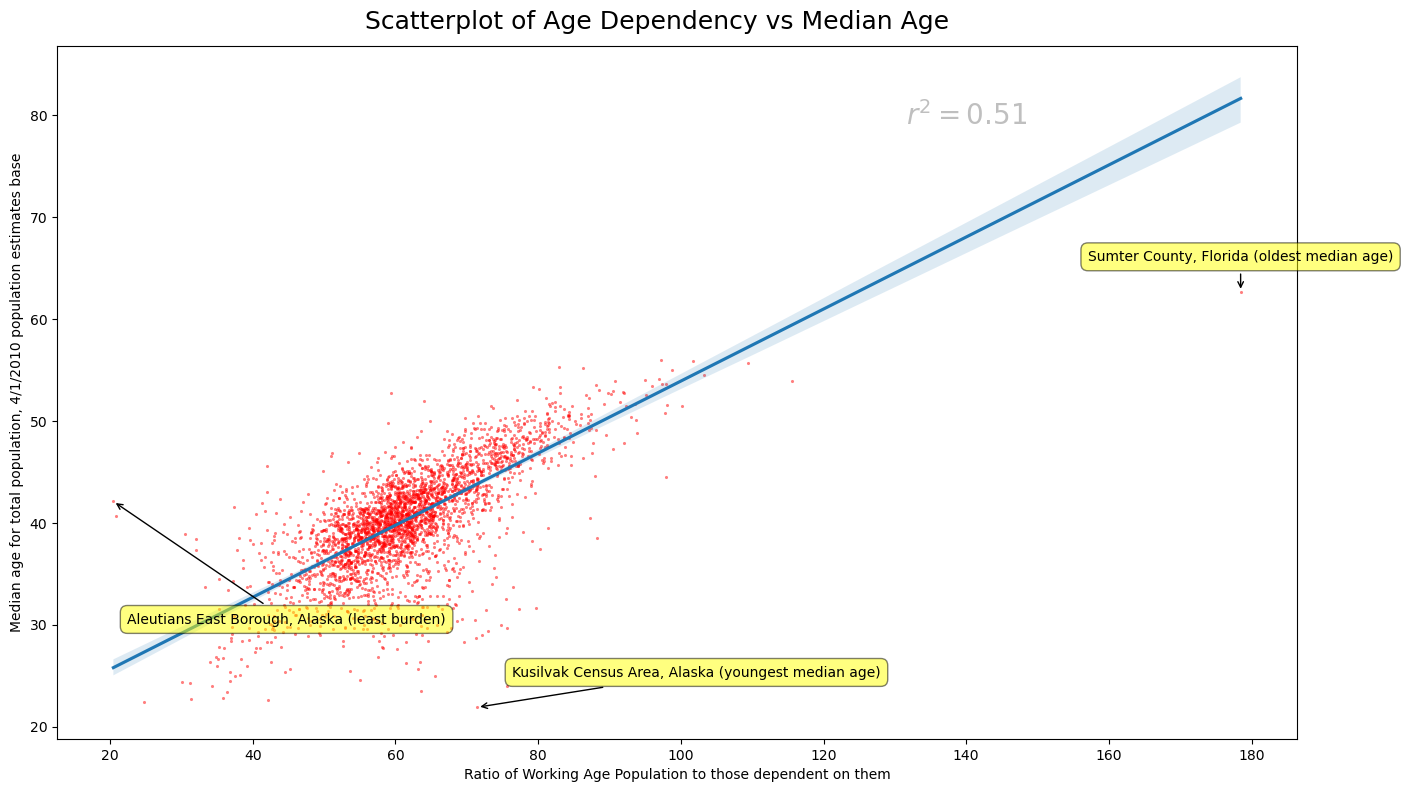

In [36]:

# First order (linear) scatterplot
fig = plt.figure(figsize=(16, 9))
scatter_kws = dict(color='r', alpha=0.5, marker='s', s=5, linewidths=0)
merge_axes_subplot = sns.regplot(x=first_column, y=max_column, scatter=True, data=df, logx=False, scatter_kws=scatter_kws)
xlabel_text = plt.xlabel(xlabel_str)
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
already_annotated = False
for label, x, y in zip(df['county_state_name'], xdata, ydata):
    if (y == ymin):
        annotation = plt.annotate(ymin_fstr.format(label),
                                  xy=(x, y), xytext=(25, 20), **kwargs)
    elif (y == ymax):
        annotation = plt.annotate(ymax_fstr.format(label),
                                  xy=(x, y), xytext=(-110, 20), **kwargs)
    elif (x == xmax):
        annotation = plt.annotate(xmax_fstr.format(label),
                                  xy=(x, y), xytext=(-110, 20), **kwargs)
    elif (x == xmin) and not already_annotated:
        already_annotated = True
        annotation = plt.annotate(xmin_fstr.format(label),
                                  xy=(x, y), xytext=(10, -90), **kwargs)

# Add r-squared
plt.text(140, 80, r'$r^2 = {0:.2}$'.format(pearsonr(xdata, ydata)[0] ** 2), fontsize=20, alpha=0.25,
         horizontalalignment='center', verticalalignment='center')

title_obj = fig.suptitle(title_str, fontsize=18, y=0.92)


----


## Plot the Pyramidness vs Republicaness

In [37]:

import seaborn as sns
from scipy.stats import pearsonr

# Explanatory variable
xname = 'presidential_2020_election_percent_republican'
xlabel_str = ssu.column_description_dict[xname]
xmin_fstr = '{} (least Republican)'
xmax_fstr = '{} (most Republican)'

# Response variable
yname = 'population_pyramidness'
ylabel_str = ssu.column_description_dict[yname]
ymin_fstr = '{} (worst age distribution)'
ymax_fstr = '{} (best age distribution)'

# Remove NaNs
def f(row_series):
    state_name = row_series.State_Name
    county_name = row_series.County_Name
    county_state_name = f'{county_name}, {state_name}'
    
    return county_state_name
counties_df['county_state_name'] = counties_df.apply(f, axis='columns')
columns_list = ['county_state_name', xname, yname]
df = counties_df[columns_list].dropna()
title_str = 'Scatterplot of Pyramidness vs Republicaness'

xdata = df[xname]
xmin = xdata.min()
xmax = xdata.max()

ydata = df[yname]
ymin = ydata.min()
ymax = ydata.max()

In [38]:

df.sample(5)

,county_state_name,presidential_2020_election_percent_republican,population_pyramidness
71,"Bristol Bay Borough, Alaska",59.05,0.125209
2546,"Brooks County, Texas",40.18,0.918753
1230,"Worcester County, Massachusetts",39.74,0.694080
1394,"Waseca County, Minnesota",63.76,0.835660
770,"Spencer County, Indiana",68.19,0.359556


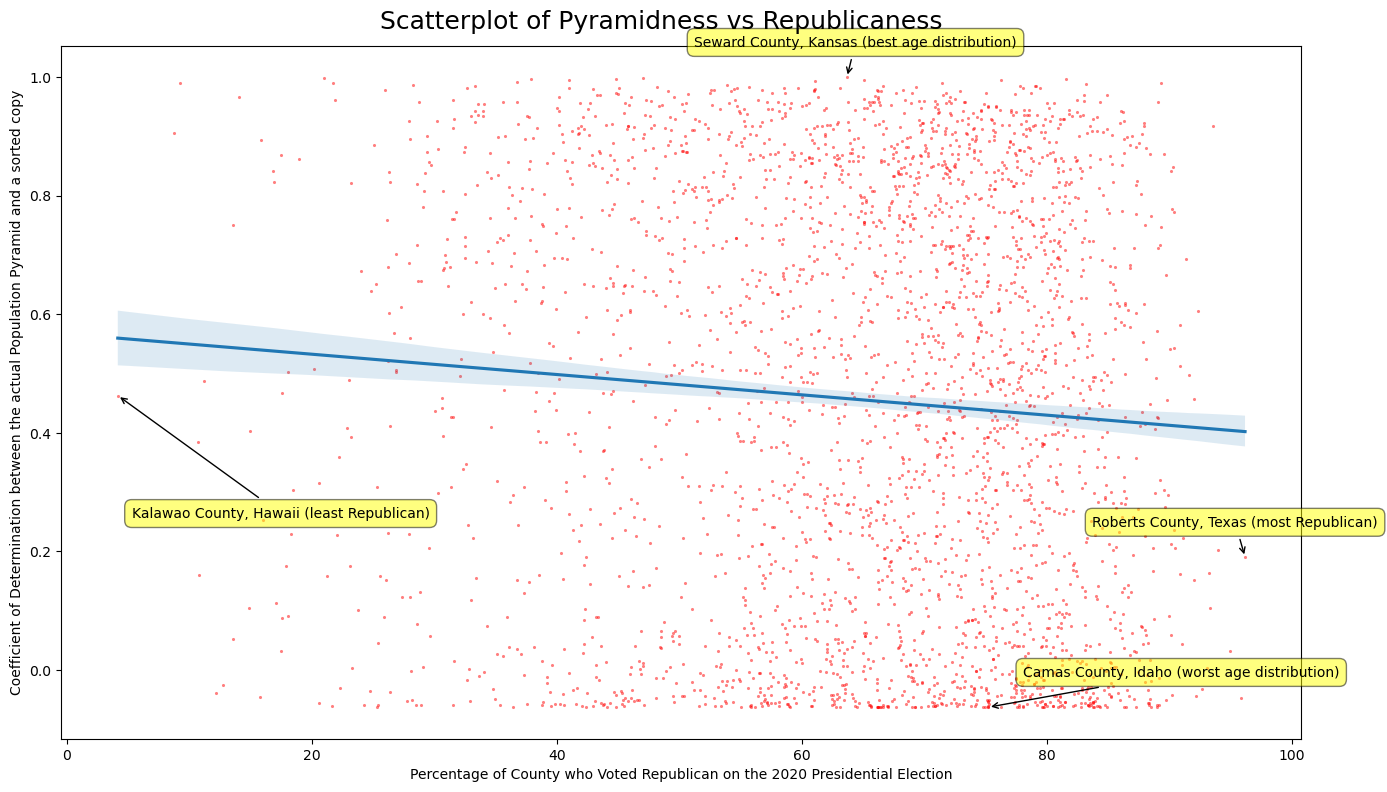

In [39]:

# First order (linear) scatterplot
fig = plt.figure(figsize=(16, 9))
scatter_kws = dict(color='r', alpha=0.5, marker='s', s=5, linewidths=0)
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df, logx=False, scatter_kws=scatter_kws)
xlabel_text = plt.xlabel(xlabel_str)
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
already_annotated = False
for label, x, y in zip(df['county_state_name'], xdata, ydata):
    if (y == ymin):
        annotation = plt.annotate(ymin_fstr.format(label),
                                  xy=(x, y), xytext=(25, 20), **kwargs)
    elif (y == ymax):
        annotation = plt.annotate(ymax_fstr.format(label),
                                  xy=(x, y), xytext=(-110, 20), **kwargs)
    elif (x == xmax):
        annotation = plt.annotate(xmax_fstr.format(label),
                                  xy=(x, y), xytext=(-110, 20), **kwargs)
    elif (x == xmin) and not already_annotated:
        already_annotated = True
        annotation = plt.annotate(xmin_fstr.format(label),
                                  xy=(x, y), xytext=(10, -90), **kwargs)

# Add r-squared
# plt.text(100, 1.0, r'$r^2 = {0:.2}$'.format(pearsonr(xdata, ydata)[0] ** 2), fontsize=20, alpha=0.25,
#          horizontalalignment='center', verticalalignment='center')

title_obj = fig.suptitle(title_str, fontsize=18, y=0.92)


----


## P-hack the Republicans

In [40]:

import statsmodels.api as sm

first_column = 'presidential_2020_election_percent_republican'
max_similarity = 0.0
max_column = first_column
for second_column in numbers_columns_list:
    if second_column == first_column:
        continue
    columns_list = [first_column, second_column]
    df = counties_df[columns_list].dropna()
    if df.shape[0] > 10:
        first_series = df[first_column]
        X = first_series.values.reshape(-1, 1)
        second_series = df[second_column]
        y = second_series.values.reshape(-1, 1)
        
        # Compute with statsmodels, by adding intercept manually
        X1 = sm.add_constant(X)
        result = sm.OLS(y, X1).fit()
        this_similarity = abs(result.rsquared_adj)
        
        if this_similarity > max_similarity:
            max_similarity = this_similarity
            max_column = second_column

In [41]:

columns_list = [first_column, max_column]
df = counties_df[columns_list].dropna()
df

,presidential_2020_election_percent_republican,age_dependency_ratio
0,71.44,53.688930
1,76.17,62.683282
2,53.45,57.919652
3,78.43,49.812684
4,89.57,60.284946
...,...,...
3137,73.66,52.818681
3138,29.58,44.687673
3139,79.73,62.301396
3140,80.88,66.880479


In [42]:

max_similarity

0.13844246098623925

In [43]:

ssu.column_description_dict[max_column]

'Ratio of Dependents to Working Age Population'


## Plot the Republicans

In [47]:

import seaborn as sns
from scipy.stats import pearsonr

# Explanatory variable
xname = max_column
xlabel_str = ssu.column_description_dict[max_column]
xmin_fstr = '{} (least burden)'
xmax_fstr = '{} (greatest burden)'

# Response variable
yname = first_column
ylabel_str = ssu.column_description_dict[first_column]
ymin_fstr = '{} (least Republican)'
ymax_fstr = '{} (most Republican)'

# Remove NaNs
def f(row_series):
    state_name = row_series.State_Name
    county_name = row_series.County_Name
    county_state_name = f'{county_name}, {state_name}'
    
    return county_state_name
counties_df['county_state_name'] = counties_df.apply(f, axis='columns')
columns_list = ['county_state_name', xname, yname]
df = counties_df[columns_list].dropna()
title_str = 'Scatterplot of Republicans vs Demographic Burden'

xdata = df[xname]
xmin = xdata.min()
xmax = xdata.max()

ydata = df[yname]
ymin = ydata.min()
ymax = ydata.max()

In [48]:

df.sample(5)

,county_state_name,age_dependency_ratio,presidential_2020_election_percent_republican
2531,"Bailey County, Texas",67.464115,77.10
1193,"Allegany County, Maryland",53.314899,68.16
321,"Baker County, Florida",51.198302,84.58
1737,"Stanton County, Nebraska",63.085399,81.02
799,"Buena Vista County, Iowa",61.974738,61.91


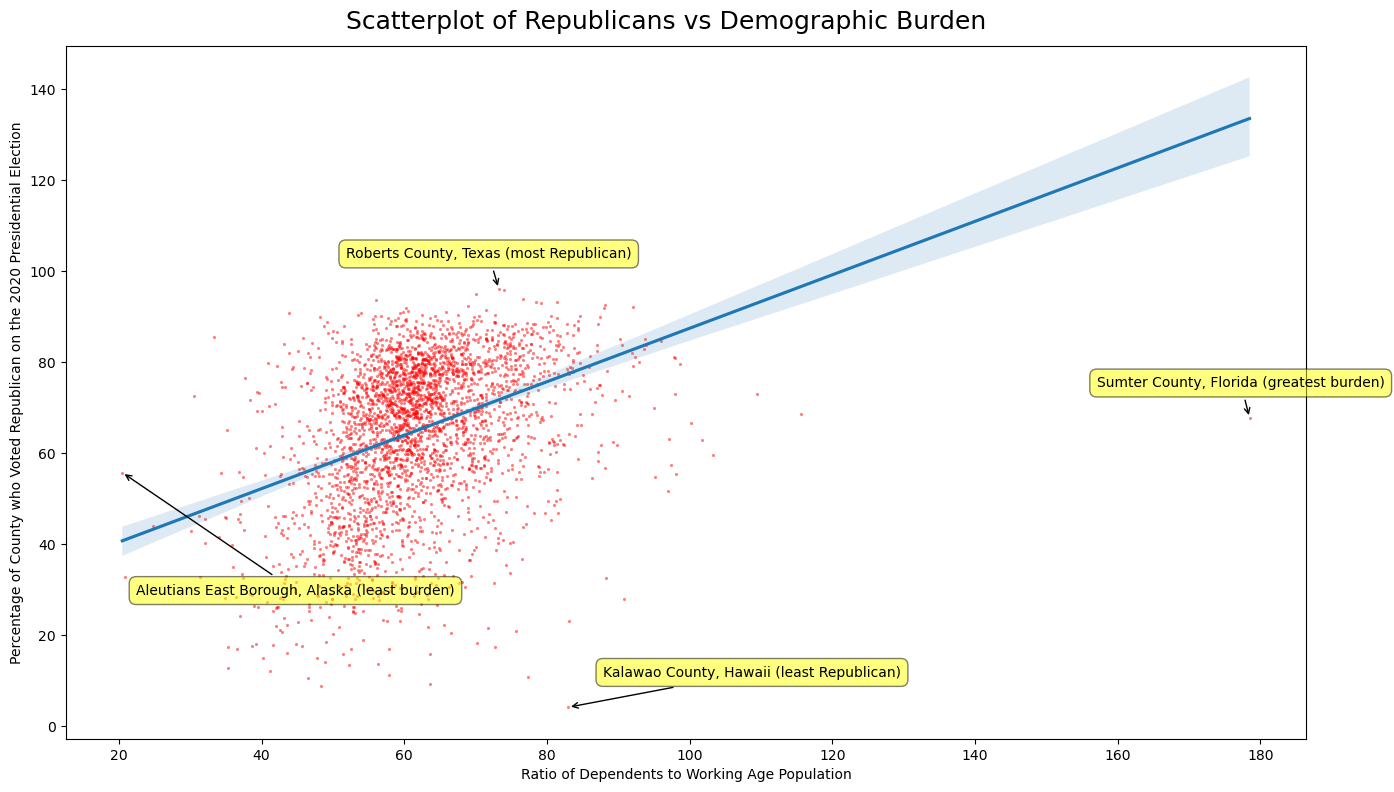

In [49]:

# First order (linear) scatterplot
fig = plt.figure(figsize=(16, 9))
scatter_kws = dict(color='r', alpha=0.5, marker='s', s=5, linewidths=0)
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df, logx=False, scatter_kws=scatter_kws)
xlabel_text = plt.xlabel(xlabel_str)
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
already_annotated = False
for label, x, y in zip(df['county_state_name'], xdata, ydata):
    if (x == xmin) and not already_annotated:
        already_annotated = True
        annotation = plt.annotate(xmin_fstr.format(label),
                                  xy=(x, y), xytext=(10, -90), **kwargs)
    elif (y == ymin):
        annotation = plt.annotate(ymin_fstr.format(label),
                                  xy=(x, y), xytext=(25, 20), **kwargs)
    elif (y == ymax):
        annotation = plt.annotate(ymax_fstr.format(label),
                                  xy=(x, y), xytext=(-110, 20), **kwargs)
    elif (x == xmax):
        annotation = plt.annotate(xmax_fstr.format(label),
                                  xy=(x, y), xytext=(-110, 20), **kwargs)

# Add r-squared
# plt.text(100, 1.0, r'$r^2 = {0:.2}$'.format(pearsonr(xdata, ydata)[0] ** 2), fontsize=20, alpha=0.25,
#          horizontalalignment='center', verticalalignment='center')

title_obj = fig.suptitle(title_str, fontsize=18, y=0.92)


----


## P-hack the Pyramid

In [50]:

import statsmodels.api as sm

first_column = 'population_pyramidness'
max_similarity = 0.0
max_column = first_column
for second_column in numbers_columns_list:
    if second_column == first_column:
        continue
    columns_list = [first_column, second_column]
    df = counties_df[columns_list].dropna()
    if df.shape[0] > 10:
        first_series = df[first_column]
        X = first_series.values.reshape(-1, 1)
        second_series = df[second_column]
        y = second_series.values.reshape(-1, 1)

        # Compute with statsmodels, by adding intercept manually
        X1 = sm.add_constant(X)
        result = sm.OLS(y, X1).fit()
        this_similarity = abs(result.rsquared_adj)

        if this_similarity > max_similarity:
            max_similarity = this_similarity
            max_column = second_column

In [51]:

columns_list = [first_column, max_column]
df = counties_df[columns_list].dropna()
df

,population_pyramidness,MEDIAN_AGE_FEM_2019PE
0,0.880475,40.7
1,0.546918,44.9
2,0.711037,44.8
3,0.607852,42.6
4,0.869172,42.0
...,...,...
3137,0.880740,36.4
3138,0.206512,39.8
3139,0.748289,37.2
3140,0.168118,44.4


In [52]:

max_similarity

0.4186484583039456

In [53]:

ssu.column_description_dict[max_column]

'Median age for female population, 7/1/2019 population estimate'


## Plot the Pyramid

In [54]:

import seaborn as sns
from scipy.stats import pearsonr

# Explanatory variable
xlabel_str = ssu.column_description_dict[first_column]
xmin_fstr = '{} (worst age distribution)'
xmax_fstr = '{} (best age distribution)'

# Response variable
ylabel_str = ssu.column_description_dict[max_column]
ymin_fstr = '{} (youngest)'
ymax_fstr = '{} (oldest)'

# Remove NaNs
def f(row_series):
    state_name = row_series.State_Name
    county_name = row_series.County_Name
    county_state_name = f'{county_name}, {state_name}'
    
    return county_state_name
counties_df['county_state_name'] = counties_df.apply(f, axis='columns')
columns_list = ['county_state_name', first_column, max_column]
df = counties_df[columns_list].dropna()
title_str = 'Scatterplot of Pyramidness vs Median Female Age'

xdata = df[first_column]
xmin = xdata.min()
xmax = xdata.max()

ydata = df[max_column]
ymin = ydata.min()
ymax = ydata.max()

In [55]:

df.sample(5)

,county_state_name,population_pyramidness,MEDIAN_AGE_FEM_2019PE
2167,"Kingfisher County, Oklahoma",0.822861,38.4
506,"Randolph County, Georgia",-0.035993,48.1
681,"Shelby County, Illinois",0.241800,46.5
1488,"Barton County, Missouri",0.446393,44.0
408,"Carroll County, Georgia",0.748313,36.2


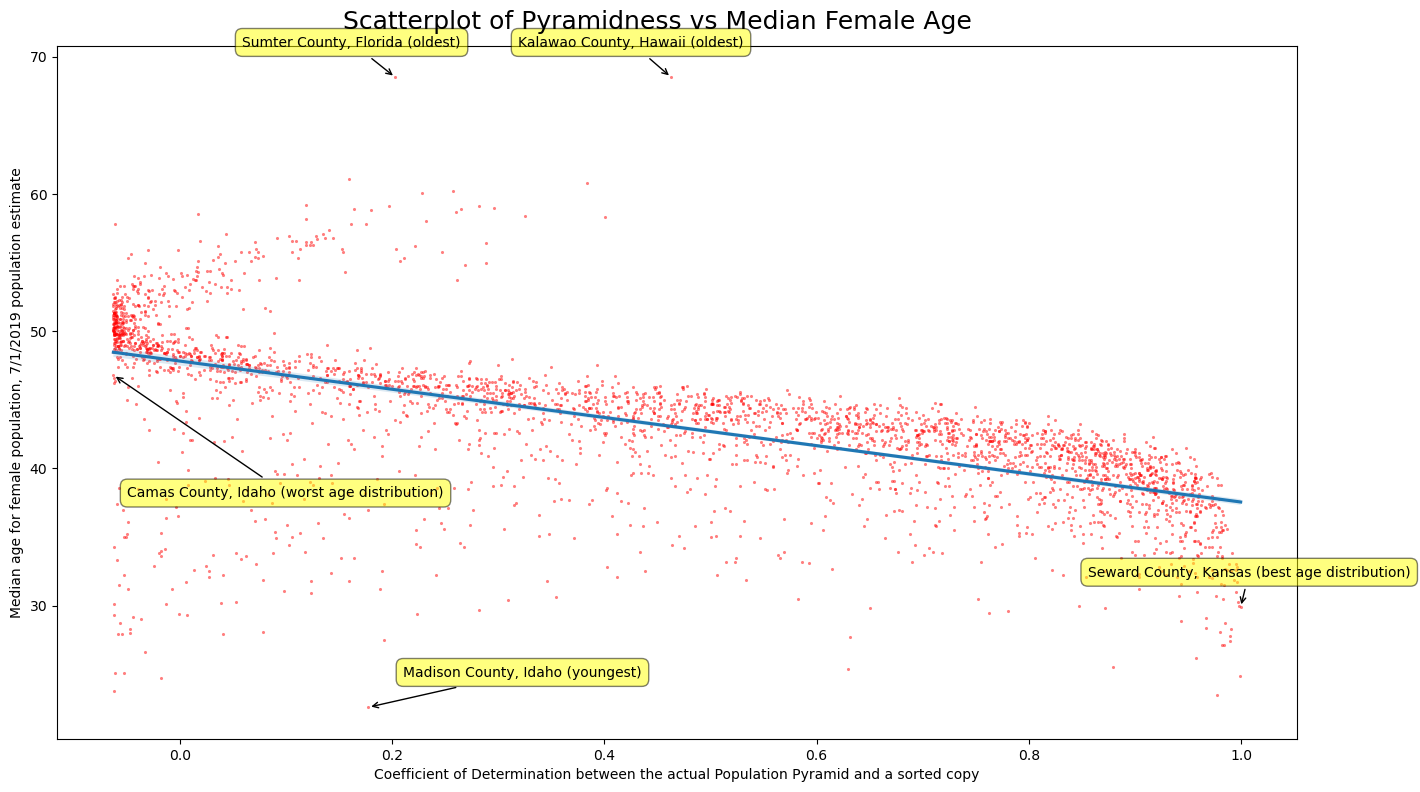

In [56]:

# First order (linear) scatterplot
fig = plt.figure(figsize=(16, 9))
scatter_kws = dict(color='r', alpha=0.5, marker='s', s=5, linewidths=0)
merge_axes_subplot = sns.regplot(x=first_column, y=max_column, scatter=True, data=df, logx=False, scatter_kws=scatter_kws)
xlabel_text = plt.xlabel(xlabel_str)
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
already_annotated = False
for label, x, y in zip(df['county_state_name'], xdata, ydata):
    if (y == ymin):
        annotation = plt.annotate(ymin_fstr.format(label),
                                  xy=(x, y), xytext=(25, 20), **kwargs)
    elif (y == ymax):
        annotation = plt.annotate(ymax_fstr.format(label),
                                  xy=(x, y), xytext=(-110, 20), **kwargs)
    elif (x == xmax):
        annotation = plt.annotate(xmax_fstr.format(label),
                                  xy=(x, y), xytext=(-110, 20), **kwargs)
    elif (x == xmin) and not already_annotated:
        already_annotated = True
        annotation = plt.annotate(xmin_fstr.format(label),
                                  xy=(x, y), xytext=(10, -90), **kwargs)

# Add r-squared
# plt.text(100, 1.0, r'$r^2 = {0:.2}$'.format(pearsonr(xdata, ydata)[0] ** 2), fontsize=20, alpha=0.25,
#          horizontalalignment='center', verticalalignment='center')

title_obj = fig.suptitle(title_str, fontsize=18, y=0.92)


----


# Visualize the Pyramids

In [57]:

from stats_charting_utils import StatsChartingUtilities

scu = StatsChartingUtilities(s=s)

https://en.wikipedia.org/wiki/Seward_County,_Kansas


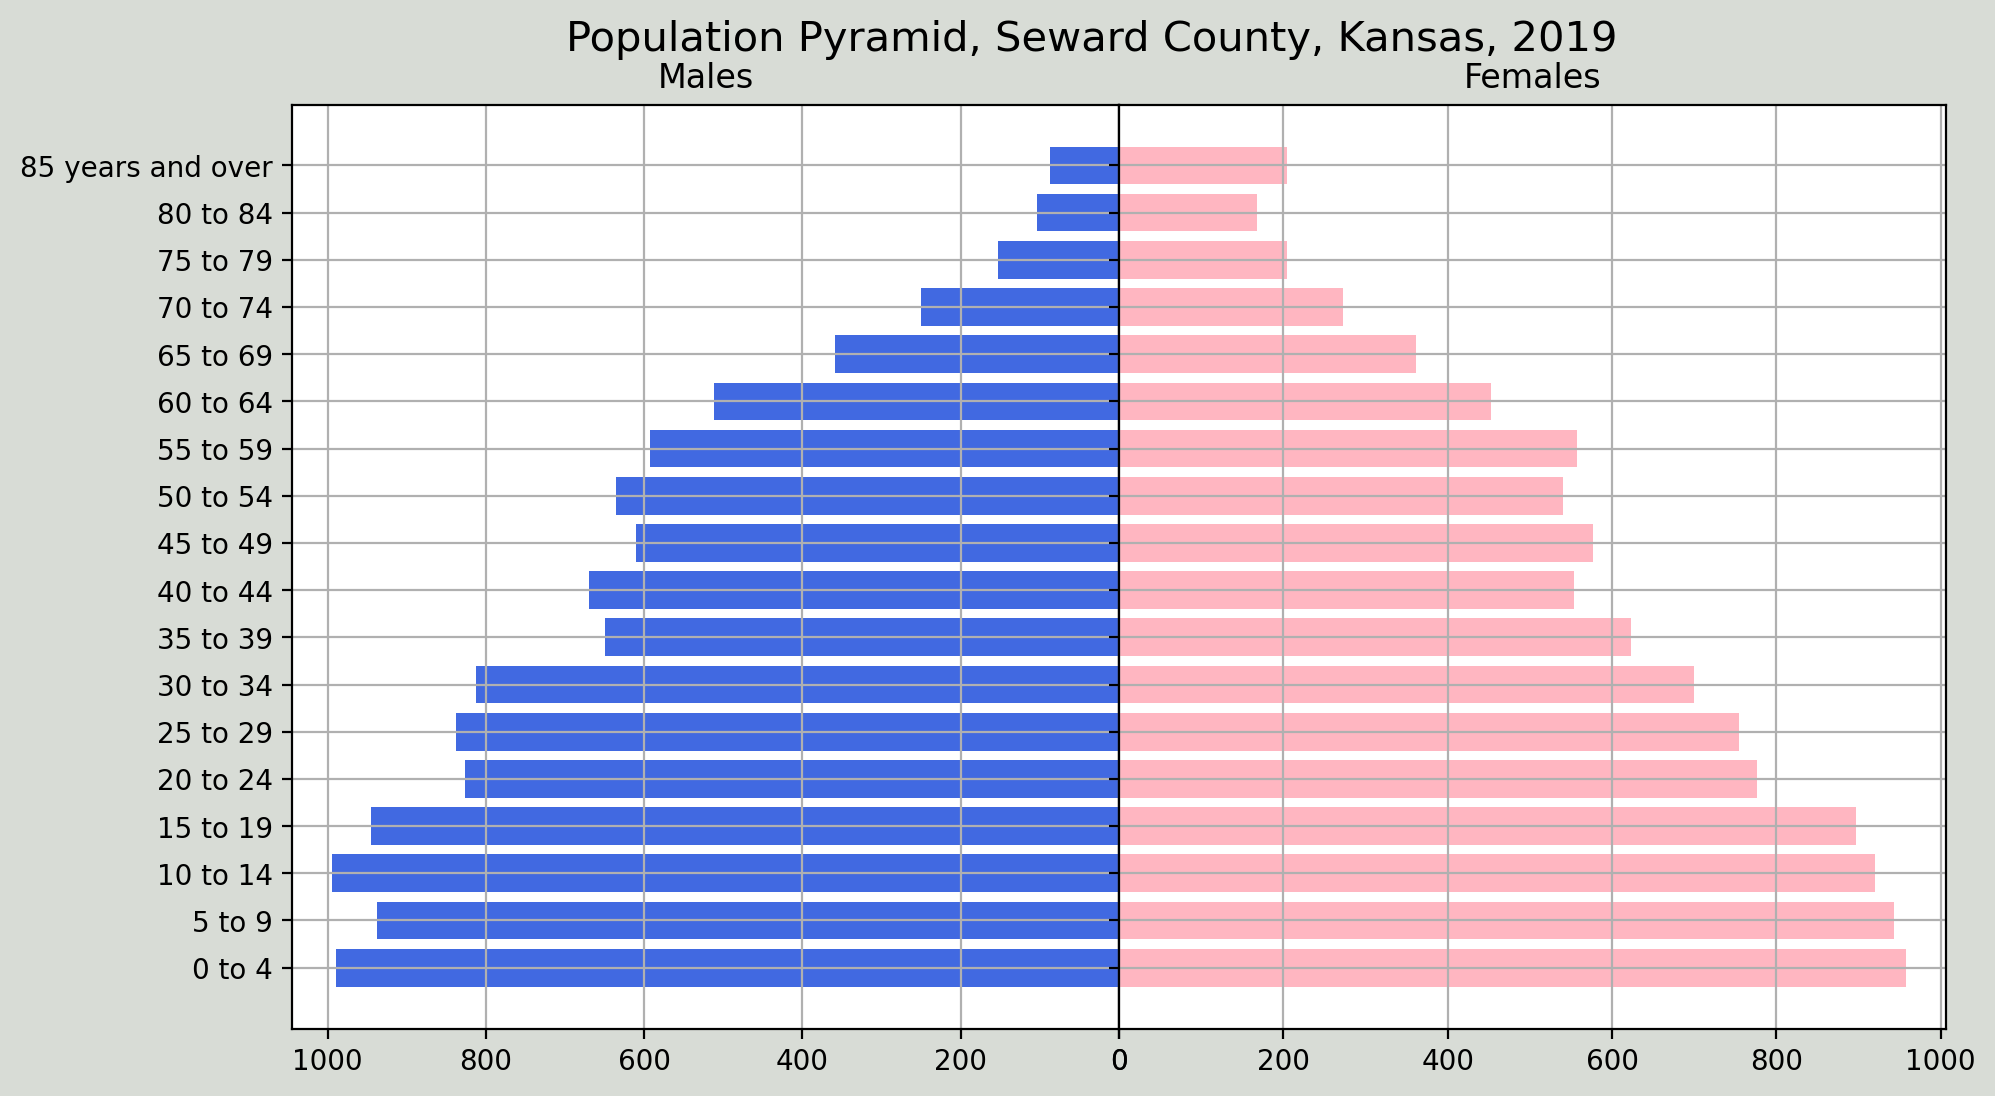

In [58]:

import pandas as pd

mask_series = (counties_df.population_pyramidness == counties_df.population_pyramidness.max())
df = counties_df[mask_series].sample(1)
print(df.Wikipedia_URL.squeeze())
fig = scu.population_pyramid(df, year=2019, show=True)

https://en.wikipedia.org/wiki/Camas_County,_Idaho


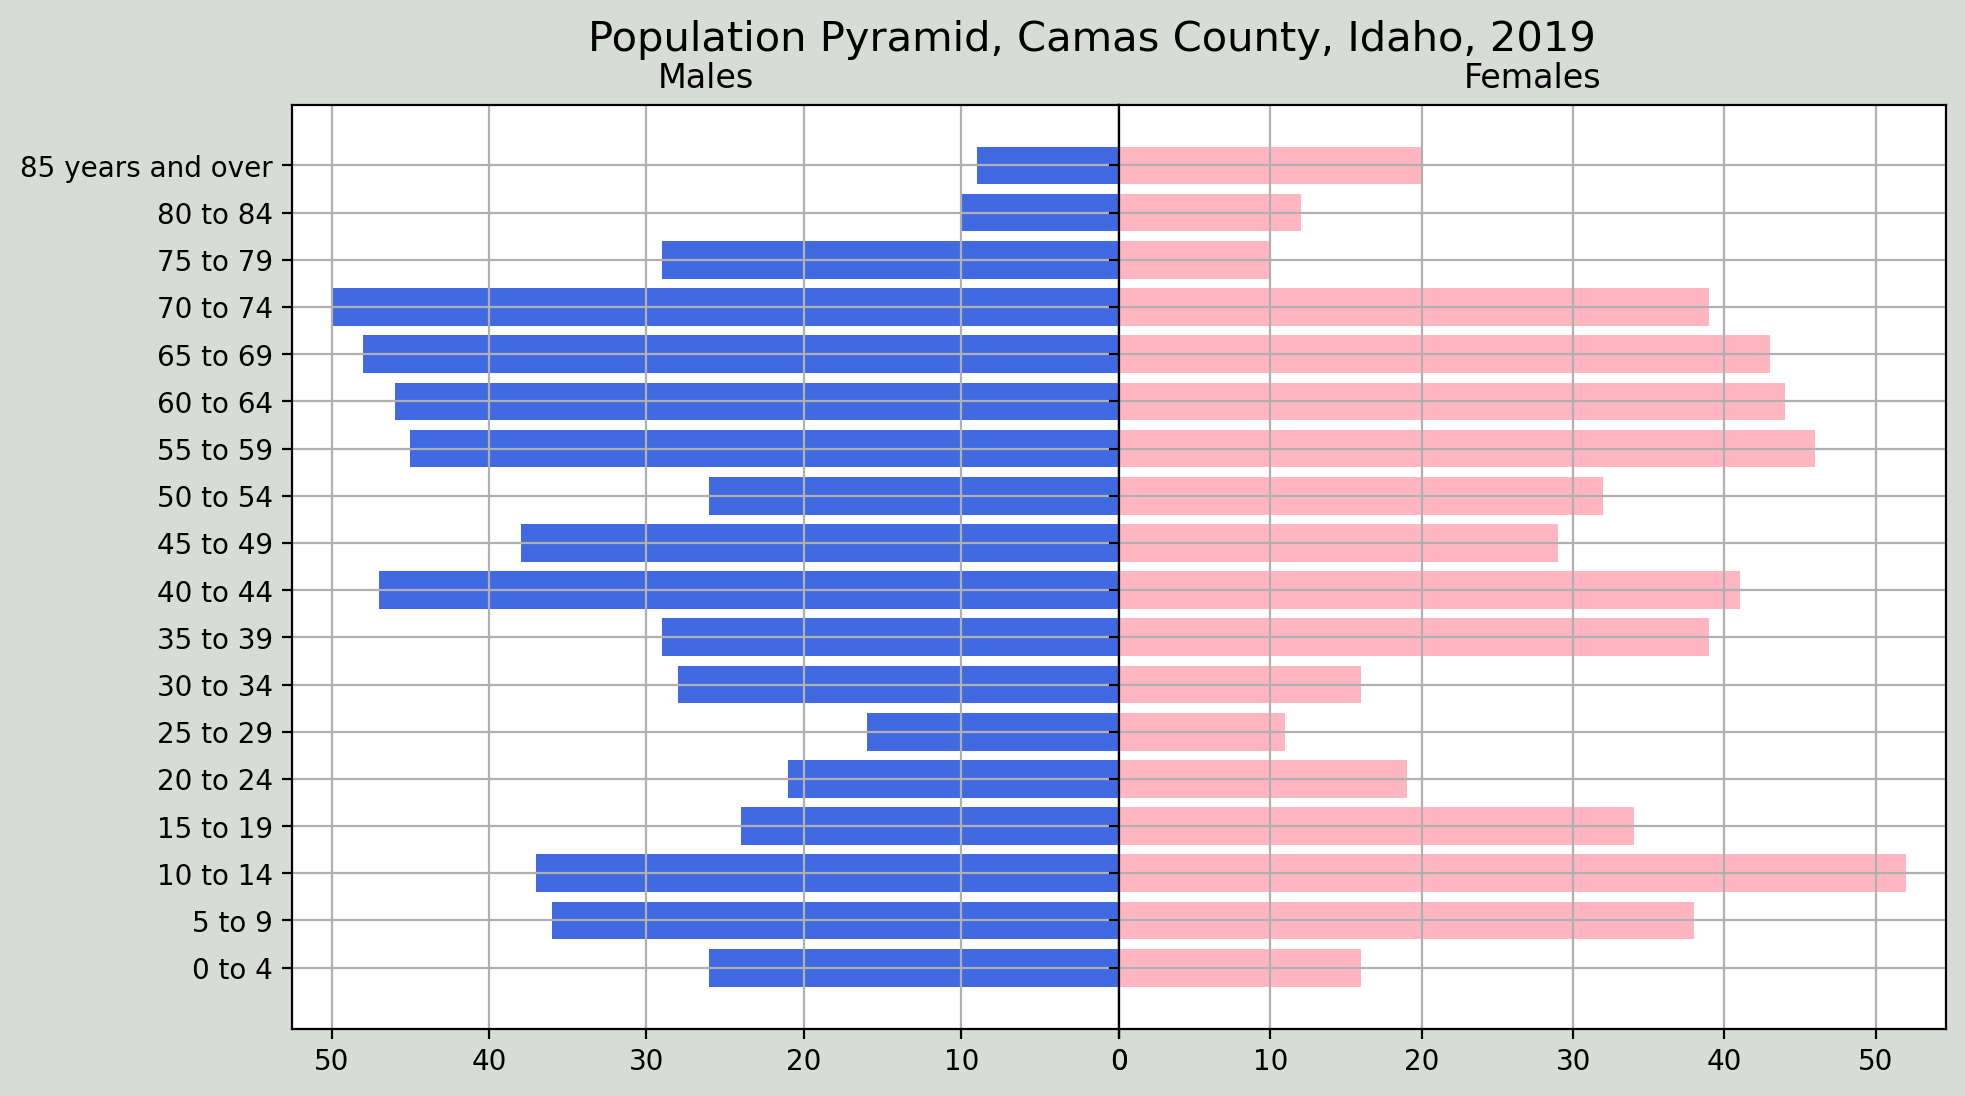

In [70]:

mask_series = (counties_df.population_pyramidness == counties_df.population_pyramidness.min())
df = counties_df[mask_series].sample(1)
print(df.Wikipedia_URL.squeeze())
# display(list(df.T.to_dict().values())[0])
fig = scu.population_pyramid(df, show=True)

https://en.wikipedia.org/wiki/Coconino_County,_Arizona


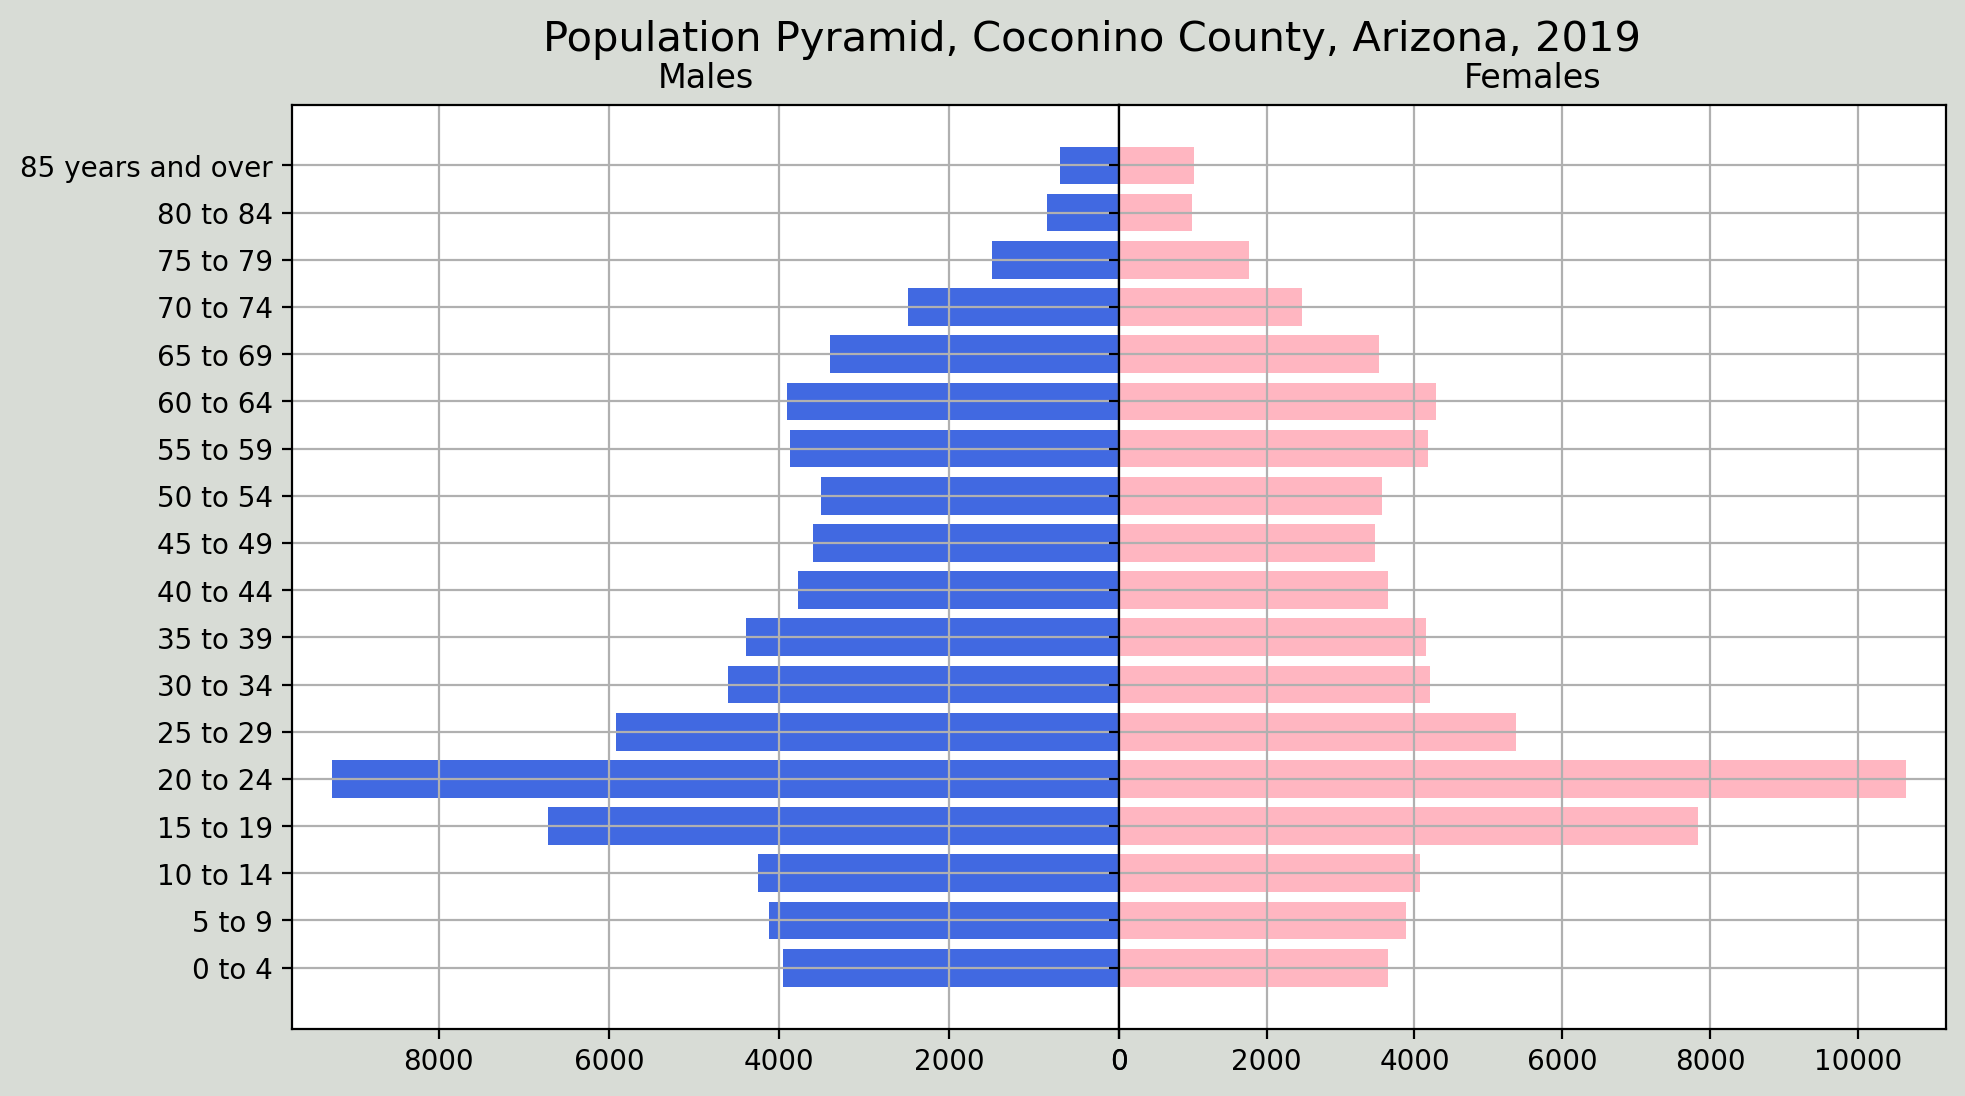

In [72]:

mask_series = (counties_df.County_Name == 'Coconino County')
df = counties_df[mask_series].sample(1)
print(df.Wikipedia_URL.squeeze())
fig = scu.population_pyramid(df, show=True)

https://en.wikipedia.org/wiki/Worcester_County,_Massachusetts


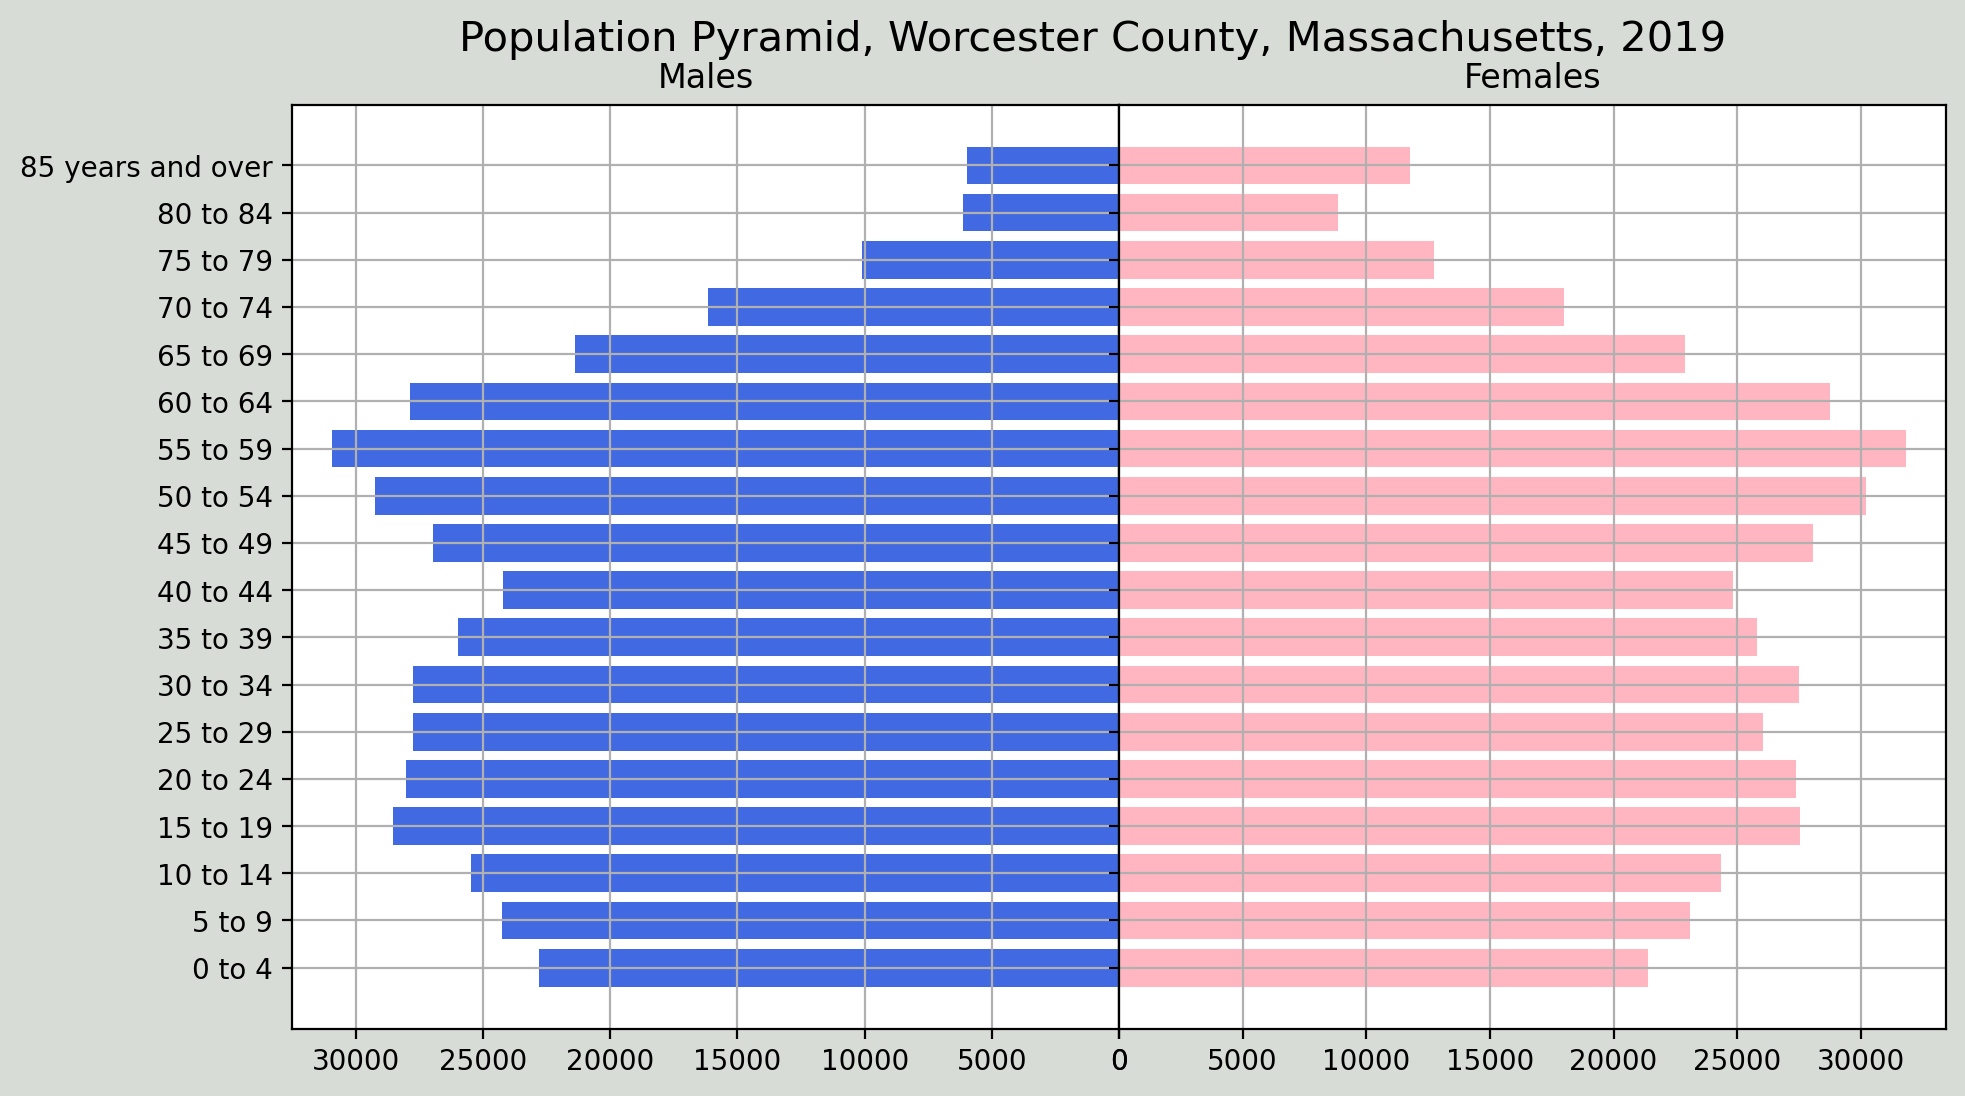

In [87]:

mask_series = (counties_df.State_Name == 'Massachusetts') & (counties_df.County_Name == 'Worcester County')
df = counties_df[mask_series].sample(1)
print(df.Wikipedia_URL.squeeze())
fig = scu.population_pyramid(df, year=2019, show=True)

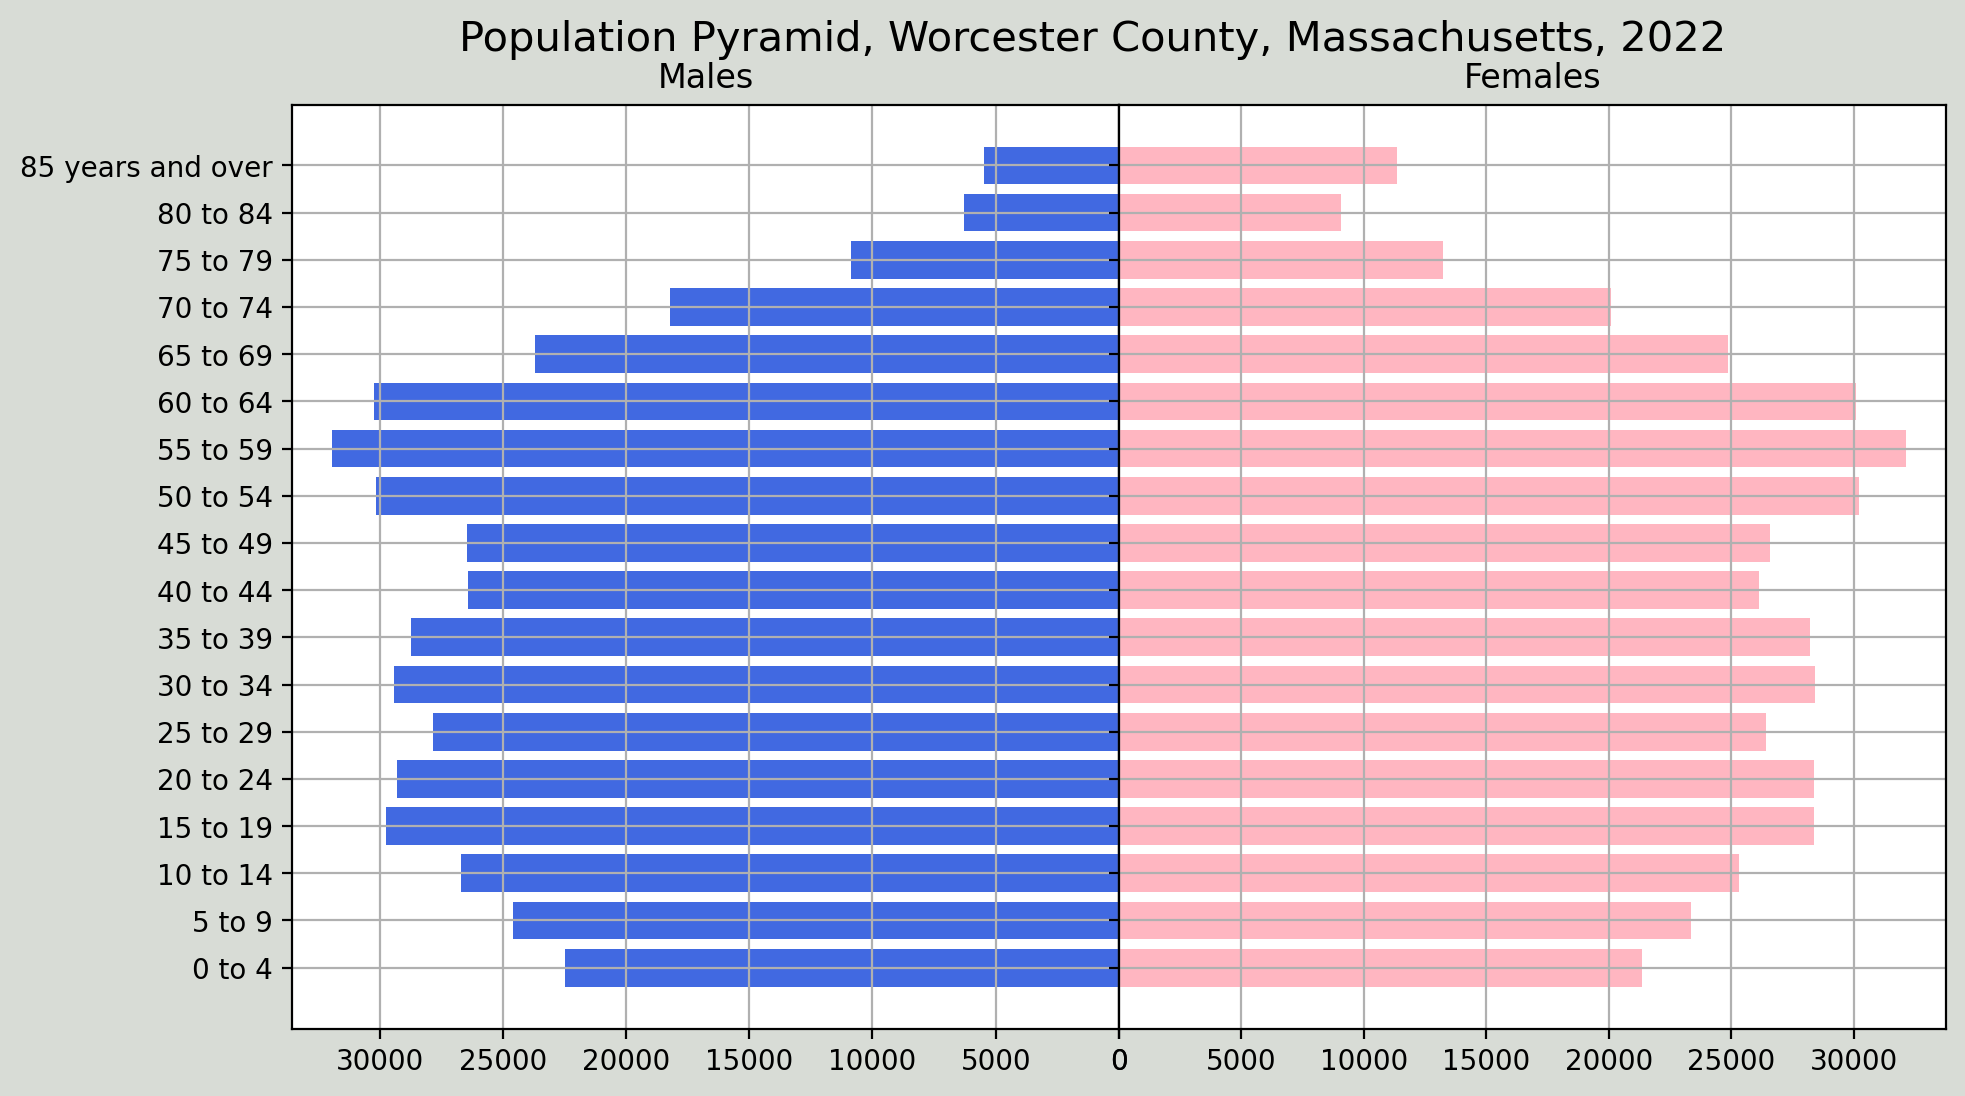

In [123]:

csv_path = '../data/csv/cc-est2022-agesex-all.csv'
df = pd.read_csv(os.path.abspath(csv_path), encoding=s.encoding_type)
# print('(' + '|'.join([cn for cn in df.columns if (cn.startswith('AGE') and (cn.endswith('_MALE') or cn.endswith('_FEM')))]) + ')')
df.columns = [
    'SUMLEV', 'STATE', 'COUNTY', 'State_Name', 'County_Name', 'YEAR', 'POPESTIMATE', 'POPEST_MALE', 'POPEST_FEM', 'UNDER5_TOT', 'UNDER5_MALE', 'UNDER5_FEM',
    'AGE513_TOT', 'AGE513_MALE', 'AGE513_FEM', 'AGE1417_TOT', 'AGE1417_MALE', 'AGE1417_FEM', 'AGE1824_TOT', 'AGE1824_MALE', 'AGE1824_FEM',
    'AGE16PLUS_TOT', 'AGE16PLUS_MALE', 'AGE16PLUS_FEM', 'AGE18PLUS_TOT', 'AGE18PLUS_MALE', 'AGE18PLUS_FEM', 'AGE1544_TOT', 'AGE1544_MALE',
    'AGE1544_FEM', 'AGE2544_TOT', 'AGE2544_MALE', 'AGE2544_FEM', 'AGE4564_TOT', 'AGE4564_MALE', 'AGE4564_FEM', 'AGE65PLUS_TOT', 'AGE65PLUS_MALE', 'AGE65PLUS_FEM',
    'AGE04_TOT', 'AGE04_MALE_2022PE', 'AGE04_FEM_2022PE', 'AGE59_TOT', 'AGE59_MALE_2022PE', 'AGE59_FEM_2022PE',
    'AGE1014_TOT', 'AGE1014_MALE_2022PE', 'AGE1014_FEM_2022PE', 'AGE1519_TOT', 'AGE1519_MALE_2022PE', 'AGE1519_FEM_2022PE',
    'AGE2024_TOT', 'AGE2024_MALE_2022PE', 'AGE2024_FEM_2022PE', 'AGE2529_TOT', 'AGE2529_MALE_2022PE', 'AGE2529_FEM_2022PE',
    'AGE3034_TOT', 'AGE3034_MALE_2022PE', 'AGE3034_FEM_2022PE', 'AGE3539_TOT', 'AGE3539_MALE_2022PE', 'AGE3539_FEM_2022PE',
    'AGE4044_TOT', 'AGE4044_MALE_2022PE', 'AGE4044_FEM_2022PE', 'AGE4549_TOT', 'AGE4549_MALE_2022PE', 'AGE4549_FEM_2022PE',
    'AGE5054_TOT', 'AGE5054_MALE_2022PE', 'AGE5054_FEM_2022PE', 'AGE5559_TOT', 'AGE5559_MALE_2022PE', 'AGE5559_FEM_2022PE',
    'AGE6064_TOT', 'AGE6064_MALE_2022PE', 'AGE6064_FEM_2022PE', 'AGE6569_TOT', 'AGE6569_MALE_2022PE', 'AGE6569_FEM_2022PE',
    'AGE7074_TOT', 'AGE7074_MALE_2022PE', 'AGE7074_FEM_2022PE', 'AGE7579_TOT', 'AGE7579_MALE_2022PE', 'AGE7579_FEM_2022PE',
    'AGE8084_TOT', 'AGE8084_MALE_2022PE', 'AGE8084_FEM_2022PE', 'AGE85PLUS_TOT', 'AGE85PLUS_MALE_2022PE', 'AGE85PLUS_FEM_2022PE',
    'MEDIAN_AGE_TOT', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM'
]
mask_series = (df.State_Name == 'Massachusetts') & (df.County_Name == 'Worcester County')
df = df[mask_series].sample(1)
fig = scu.population_pyramid(df, year=2022, show=True)

In [75]:

for left, right in zip([f'AGE8084_FEM_{i}PE' for i in range(2010, 2020)], [cn for cn in counties_df.columns if 'AGE8084_FEM' in cn.upper()]):
    print(left, right)

AGE8084_FEM_2010PE AGE8084_FEM_2010CP
AGE8084_FEM_2011PE AGE8084_FEM_2010PEB
AGE8084_FEM_2012PE AGE8084_FEM_2010PE
AGE8084_FEM_2013PE AGE8084_FEM_2011PE
AGE8084_FEM_2014PE AGE8084_FEM_2012PE
AGE8084_FEM_2015PE AGE8084_FEM_2013PE
AGE8084_FEM_2016PE AGE8084_FEM_2014PE
AGE8084_FEM_2017PE AGE8084_FEM_2015PE
AGE8084_FEM_2018PE AGE8084_FEM_2016PE
AGE8084_FEM_2019PE AGE8084_FEM_2017PE


https://en.wikipedia.org/wiki/Arthur_County,_Nebraska


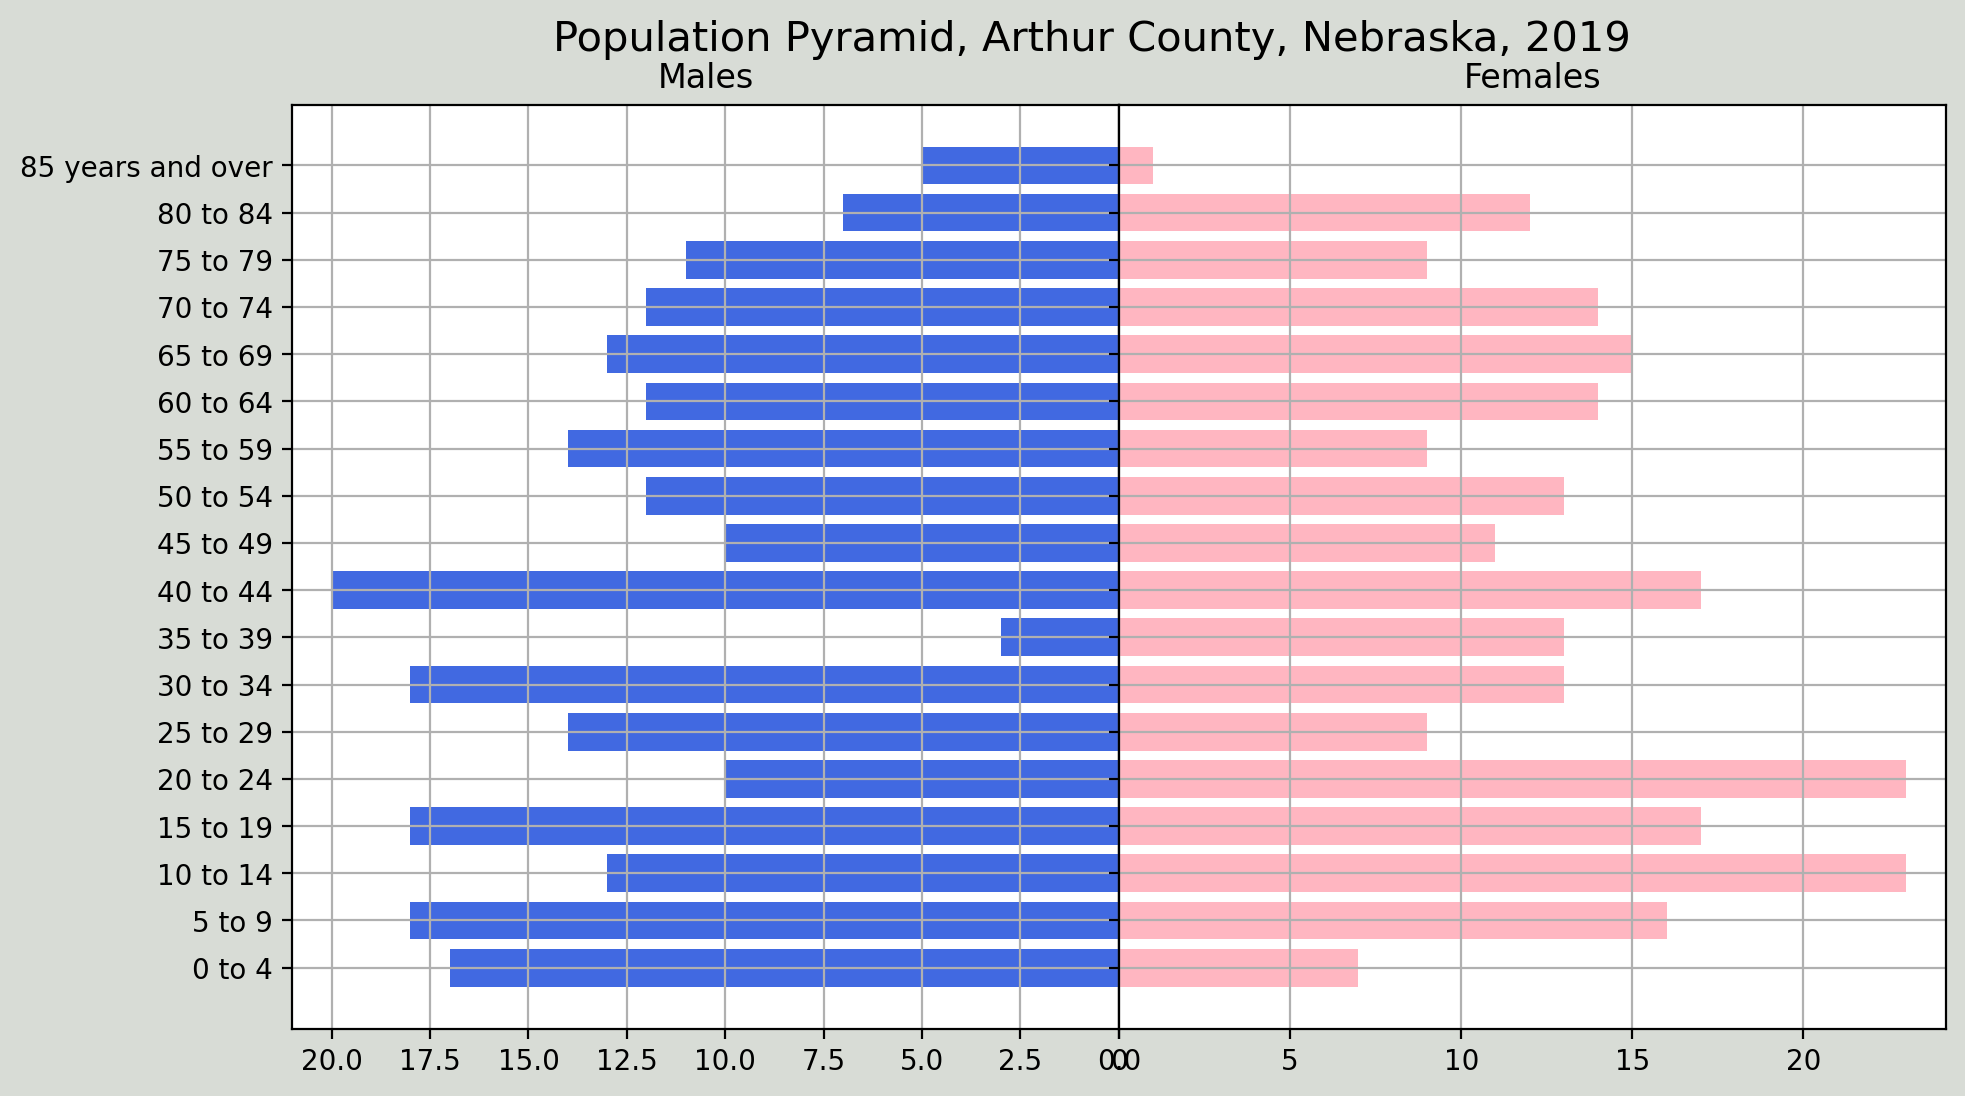

In [127]:

counties_df['w2m_ratio'] = counties_df['AGE2024_FEM_2019PE'] / counties_df['AGE2024_MALE_2019PE']
df = counties_df.sort_values('w2m_ratio').tail(2).head(1)
print(df.Wikipedia_URL.squeeze())
fig = scu.population_pyramid(df, year=2019, show=True)